# Проект Экоферма

# Цель

Разработать модель машинного обучения, которая поможет управлять рисками и принимать объективное решение о покупке коров для экофермы. 

# Задачи

Создать две прогнозные модели:
- прогнозировать возможный удой коровы (целевой признак `Удой`)
- рассчитывать вероятность получить вкусное молоко от коровы (целевой признак `Вкус молока`)

С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

# Данные

Получено 3 датасета
- ferma_main.csv
- ferma_dad.csv
- cow_buy_old.csv

`ferma_main.csv` - харктеристики стада

-	`id` — уникальный идентификатор коровы.
-	`Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
-	`ЭКЕ` (Энергетическая кормовая единица) — показатель питательности корма коровы.
-	`Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
-	`СПО` (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
-	`Порода` — порода коровы.
-	`Тип пастбища` — ландшафт лугов, на которых паслась корова.
-	`Порода папы_быка` — порода папы коровы.
-	`Жирность,%` — содержание жиров в молоке (в процентах).
-	`Белок,%`— содержание белков в молоке (в процентах).
-	`Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
-	`Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).


`ferma_dad.csv` - характеристики папы быка

-	`id` — уникальный идентификатор коровы.
-	`Имя Папы` — имя папы коровы.

`cow_buy_old.csv` - выборка из стада, которую хочет изучить фермер перед покупкой.

-	`Порода` — порода коровы.
-	`Тип пастбища` — ландшафт лугов, на которых паслась корова.
-	`Порода папы_быка` — порода папы коровы.
-   `Имя_папы` — имя папы коровы.
-	`Текущая_жирность,%` — содержание жиров в молоке (в процентах).
-	`Текущий_уровень_белок,%`— содержание белков в молоке (в процентах).
-	`Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

## Загрузка данных

In [1]:
#pip install scikit-learn -q -U

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

RANDOM_STATE = 10

In [3]:
project_path1 = '/datasets/'
project_path2 = 'C:\\Users\\kushn\\Documents\\Python_trainings\\Yandex_DS\\Ferma_predictions\\'

In [4]:
if os.path.exists(project_path1):
    buy_data = pd.read_csv(project_path1 + 'cow_buy.csv', sep=";")
    dad_data = pd.read_csv(project_path1 + 'ferma_dad.csv', sep=";")
    main_data = pd.read_csv(project_path1 + 'ferma_main.csv', sep=";")   
elif os.path.exists(project_path2):
    buy_data = pd.read_csv(project_path2+ 'cow_buy.csv', sep=";")
    dad_data = pd.read_csv(project_path2 + 'ferma_dad.csv', sep=";")
    main_data = pd.read_csv(project_path2 + 'ferma_main.csv', sep=";")
else:
    print('Something is wrong')

In [5]:
print("Размерность датафрейма  buy_data:", buy_data.shape)
print(buy_data.info())
buy_data.head(1)

Размерность датафрейма  buy_data: (20, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB
None


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет


In [6]:
print("Размерность датафрейма dad_data:", dad_data.shape)
print(dad_data.info())
dad_data.head(1)

Размерность датафрейма dad_data: (629, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None


,id,Имя Папы
0,1,Буйный


In [7]:
print("Размерность датафрейма main_data:", main_data.shape)
print(main_data.info())
main_data.head(1)

Размерность датафрейма main_data: (634, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет


In [8]:
pd.DataFrame(main_data.columns)

,0
0,id
1,"Удой, кг"
2,ЭКЕ (Энергетическая кормовая единица)
3,"Сырой протеин, г"
4,СПО (Сахаро-протеиновое соотношение)
5,Порода
6,Тип пастбища
7,порода папы_быка
8,"Жирность,%"
9,"Белок,%"


In [9]:
main_data.rename(columns=\
    {'Удой, кг':'milk_yield', 'ЭКЕ (Энергетическая кормовая единица)':'EFU',
       'Сырой протеин, г':'feed_protein', 'СПО (Сахаро-протеиновое соотношение)':'SPR',
       'Порода':'breed', 'Тип пастбища':'pasture', 'порода папы_быка':'dad_breed',
       'Жирность,%':'milk_fat', 'Белок,%':'milk_protein', 'Вкус молока':'milk_taste',
       'Возраст':'cow_age'}, inplace=True
)

In [10]:
pd.DataFrame(main_data.columns)

,0
0,id
1,milk_yield
2,EFU
3,feed_protein
4,SPR
5,breed
6,pasture
7,dad_breed
8,milk_fat
9,milk_protein


In [11]:
pd.DataFrame(dad_data.columns)

,0
0,id
1,Имя Папы


In [12]:
dad_data.rename(columns={'Имя Папы':'dad_name'}, inplace=True)

In [13]:
pd.DataFrame(dad_data.columns)

,0
0,id
1,dad_name


In [14]:
pd.DataFrame(buy_data.columns)

,0
0,Порода
1,Тип пастбища
2,порода папы_быка
3,Имя_папы
4,"Текущая_жирность,%"
5,"Текущий_уровень_белок,%"
6,Возраст


In [15]:
buy_data.rename(columns=\
    {'Порода':'breed', 'Тип пастбища':'pasture', 'порода папы_быка':'dad_breed',
       'Имя_папы':'dad_name','Текущая_жирность,%':'milk_fat',
       'Текущий_уровень_белок,%':'milk_protein',
       'Возраст':'cow_age'}, inplace=True
)

In [16]:
pd.DataFrame(list(buy_data.columns))

,0
0,breed
1,pasture
2,dad_breed
3,dad_name
4,milk_fat
5,milk_protein
6,cow_age


### Выводы. Загрузка данных.

Получены 3 датафрейма:
- main_data - размерность (634, 12)
- dad_data - размерность (639, 2)
- buy_data - размерность (20, 6)


Исправлены названия столбцов main_data
-	id	-	id
-	Удой, кг	-	milk_yield
-	ЭКЕ (Энергетическая кормовая единица)	-	EFU
-	Сырой протеин, г	-	feed_protein
-	СПО (Сахаро-протеиновое соотношение)	-	SPR
-	Порода	-	breed
-	Тип пастбища	-	pasture
-	порода папы_быка	-	dad_breed
-	Жирность,%	-	milk_fat
-	Белок,%	-	milk_protein
-	Вкус молока	-	milk_taste
-	Возраст	-	cow_age


Исправлены названия столбцов dad_data
-	id	-	id
-	Имя	Папы -	dad_name

Исправлены названия столбцов buy_data
-	Порода	-	breed
-	Тип пастбища	-	pasture
-	порода папы_быка	-	dad_breed
-	Имя_папы	-	dad_name
-	Текущая_жирность,%	-	curent_milk_fat
-	Текущий_уровень_белок,%	-	curent_milk_protein

## Предобработка

### Проверим полные дубли

In [17]:
print(main_data.shape)
main_data.duplicated().sum()

(634, 12)


5

In [18]:
main_data.drop_duplicates(inplace=True)
main_data.shape

(629, 12)

In [19]:
dad_data.duplicated().sum()

0

In [20]:
print(buy_data.duplicated().sum())
buy_data.shape

4


(20, 7)

In [21]:
#buy_data.drop_duplicates(inplace=True)
#buy_data.shape

### Оценим пропуски и тип данных в стобцах

In [22]:
def output_info (df):
    output = []
    for col in df.columns:
        nul = df[col].isna().sum()
        non_nul = len(df) - nul
        nunique = df[col].nunique()
        col_type = str(df[col].dtype)
        output.append([col, non_nul, nul, nunique, col_type])
    output = pd.DataFrame(output)
    output.columns = ['col_name','non-null_values','null_values', 'unique_amount', 'dtype']
    return output

In [23]:
output_info(main_data)

,col_name,non-null_values,null_values,unique_amount,dtype
0,id,629,0,629,int64
1,milk_yield,629,0,528,int64
2,EFU,629,0,55,object
3,feed_protein,629,0,401,int64
4,SPR,629,0,12,object
5,breed,629,0,2,object
6,pasture,629,0,3,object
7,dad_breed,629,0,3,object
8,milk_fat,629,0,50,object
9,milk_protein,629,0,15,object


Заменим в дробных значениях `,` на `.` и переведем строковые данные в дробные

In [24]:
def sep_to_dot (df, col):
    df[col] = df[col].str.replace(',' , '.', regex=False).astype(float)

In [25]:
to_replace = ['EFU', 'SPR', 'milk_fat', 'milk_protein']
for col in to_replace:
    sep_to_dot(main_data, col)


In [26]:
main_data['milk_yield'] = main_data['milk_yield'].astype(float)
main_data['feed_protein'] = main_data['feed_protein'].astype(float)

In [27]:
output_info(main_data)

,col_name,non-null_values,null_values,unique_amount,dtype
0,id,629,0,629,int64
1,milk_yield,629,0,528,float64
2,EFU,629,0,55,float64
3,feed_protein,629,0,401,float64
4,SPR,629,0,12,float64
5,breed,629,0,2,object
6,pasture,629,0,3,object
7,dad_breed,629,0,3,object
8,milk_fat,629,0,50,float64
9,milk_protein,629,0,15,float64


In [28]:
output_info(dad_data)

,col_name,non-null_values,null_values,unique_amount,dtype
0,id,629,0,629,int64
1,dad_name,629,0,4,object


In [29]:
output_info(buy_data)

,col_name,non-null_values,null_values,unique_amount,dtype
0,breed,20,0,2,object
1,pasture,20,0,2,object
2,dad_breed,20,0,2,object
3,dad_name,20,0,4,object
4,milk_fat,20,0,12,object
5,milk_protein,20,0,12,object
6,cow_age,20,0,2,object


In [30]:
to_replace = ['milk_fat', 'milk_protein']
for i in to_replace:
    sep_to_dot(buy_data, i)

In [31]:
output_info(buy_data)

,col_name,non-null_values,null_values,unique_amount,dtype
0,breed,20,0,2,object
1,pasture,20,0,2,object
2,dad_breed,20,0,2,object
3,dad_name,20,0,4,object
4,milk_fat,20,0,12,float64
5,milk_protein,20,0,12,float64
6,cow_age,20,0,2,object


### Проверим категориальные признаки

In [32]:
main_data.breed.unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [33]:
main_data.breed = main_data.breed.str.replace(' ' , '', regex=False)
main_data.breed.unique()

array(['ВисБикАйдиал', 'РефлешнСоверинг'], dtype=object)

In [34]:
main_data.pasture.unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [35]:
main_data.loc[main_data.loc[:,'pasture'] == "Равнинные", 'pasture'] = 'Равнинное'
main_data.pasture.unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [36]:
main_data.dad_breed.unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [37]:
main_data.loc[main_data.loc[:,'dad_breed'] == "Айдиалл", 'dad_breed'] = 'Айдиал'
main_data.loc[main_data.loc[:,'dad_breed'] == "Айдиал", 'dad_breed'] = 'ВисБикАйдиал'
main_data.loc[main_data.loc[:,'dad_breed'] == "Соверин", 'dad_breed'] = 'РефлешнСоверинг'
main_data.dad_breed.unique()

array(['ВисБикАйдиал', 'РефлешнСоверинг'], dtype=object)

In [38]:
main_data.loc[main_data.loc[:,'milk_taste'] == "не вкусно", 'milk_taste'] = 'не_вкусно'
main_data.milk_taste.unique()

array(['вкусно', 'не_вкусно'], dtype=object)

In [39]:
dad_data.dad_name.unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [40]:
buy_data.breed.unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [41]:
buy_data.breed = buy_data.breed.str.replace(' ', '', regex=False)
buy_data.breed.unique()

array(['ВисБикАйдиал', 'РефлешнСоверинг'], dtype=object)

In [42]:
buy_data.pasture.unique()

array(['холмистое', 'равнинное'], dtype=object)

In [43]:
buy_data.pasture = buy_data.pasture.str.title()
buy_data.pasture.unique()

array(['Холмистое', 'Равнинное'], dtype=object)

In [44]:
buy_data.dad_breed.unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [45]:
buy_data.loc[buy_data.loc[:,'dad_breed'] == "Айдиал", 'dad_breed'] = 'ВисБикАйдиал'
buy_data.loc[buy_data.loc[:,'dad_breed'] == "Соверин", 'dad_breed'] = 'РефлешнСоверинг'
buy_data.dad_breed.unique()

array(['ВисБикАйдиал', 'РефлешнСоверинг'], dtype=object)

In [46]:
buy_data.dad_name.unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

Может ли корова от отца одной породы быть другй породы?

In [47]:
main_data.pivot_table(index=['dad_breed', 'breed'], values=['milk_yield'], aggfunc=['count'])

count
                                milk_yield
dad_breed       breed                     
ВисБикАйдиал    ВисБикАйдиал           200
                РефлешнСоверинг        118
РефлешнСоверинг ВисБикАйдиал           173
                РефлешнСоверинг        138

Скорее всего ошибка в записях породы коров. Можно будет исправить после добавления данных имени с именами отцов

### <b> Выводы. Предобработка.</b>

`main_data`
-	удалено 5 полных дублей - новая размерность (629, 12)
-	EFU, SPR, milk_fat, milk_protein - исправлены `,` на `.` перерведены в тип `float`
-	milk_yield, feed_protein - перерведены в тип `float`
-	breed - убрали пробелы в наименовании породы `Вис Бик Айдиал` -> `ВисБикАйдиал`
-	pasture - заменили значение `Равнинные` на `Равнинное`
-	dad_breed - заменили значение `Айдиалл`->`Айдиал`->`ВисБикАйдиал`, `Соверин`->`РефлешнСоверинг`
-	milk_taste - заменили значение `не вкусно`->`не_вкусно`
-   Ошибки в данных о записи породы коров

`buy_data`
-   curent_milk_fat, curent_milk_protein - исправлены `,` на `.` перерведены в тип `float`
-	breed - убрали пробелы в наименовании породы `Вис Бик Айдиал` -> `ВисБикАйдиал`
-	pasture - заменили значение `холмистое`->`Холмистое`, `равнинное`->`Равнинное`
-   dad_breed - заменили значение `Айдиал`->`ВисБикАйдиал`, `Соверин`->`РефлешнСоверинг`

## EDA

### Исследуем количественные признаки

In [48]:
def describe_fun (df, features):
    output = []
    for col in df[features].columns:
        min_val = df[col].min()
        max_val = df[col].max()
        mean_val = df[col].mean()
        median_val = df[col].median()
        std_val = df[col].std()
        output.append([col, min_val, max_val, mean_val, median_val, std_val])
    output = pd.DataFrame(output)
    output.columns = ['feature','min','max', 'mean', 'median', 'std']
    return output

In [49]:
num_features = main_data.select_dtypes(exclude=['object', 'int']).columns

In [50]:
describe_fun(main_data, num_features)

,feature,min,max,mean,median,std
0,milk_yield,5204.000,45616.000,6188.750397,6133.000,1644.795489
1,EFU,10.900,16.800,14.543879,14.700,1.306408
2,feed_protein,1660.000,2349.000,1923.364070,1888.000,182.956251
3,SPR,0.840,0.960,0.913116,0.930,0.032203
4,milk_fat,2.990,3.750,3.603657,3.650,0.168656
5,milk_protein,3.069,3.085,3.075671,3.076,0.002549


45 тысяч литров с коровы выглядят подозрительными

### <b>Изучим признак "удои"</b>

In [51]:
def feature_distribution (df, col, title, xlabel):
    x = df[col]
    fig, ax = plt.subplots(figsize=(15,5))
    sns.kdeplot(x, color='red', ax=ax)
    kdeline = ax.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    Mean = x.mean()
    Median = x.median()
    sdev = x.std()
    left = Mean - sdev
    right = Mean + sdev
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel("Плотность распределения", fontsize=10)
    ax.vlines(Mean, 0, np.interp(Mean, xs, ys), label='Mean', color='blue', ls=':')
    ax.vlines(Median, 0, np.interp(Median, xs, ys),label='Median', color='green', ls=':')
    ax.text(Mean, .1, str(round(Mean,2)), color='blue', transform=ax.get_xaxis_transform())
    ax.text(Median, .2, str(round(Median,2)), color='green', transform=ax.get_xaxis_transform())
    ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, alpha=0.2)
    plt.legend()
    plt.show()

In [52]:
describe_fun(main_data, ['milk_yield'])

,feature,min,max,mean,median,std
0,milk_yield,5204.0,45616.0,6188.750397,6133.0,1644.795489


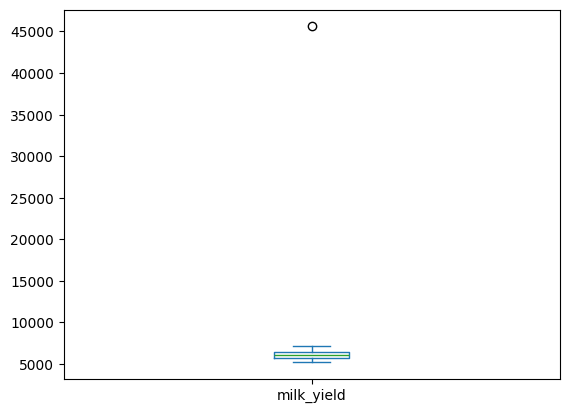

In [53]:
main_data.milk_yield.plot(kind='box');

In [54]:
main_data.query('milk_yield > 10000')

,id,milk_yield,EFU,feed_protein,SPR,breed,pasture,dad_breed,milk_fat,milk_protein,milk_taste,cow_age
16,17,45616.0,11.5,1675.0,0.93,ВисБикАйдиал,Холмистое,ВисБикАйдиал,3.22,3.076,вкусно,более_2_лет


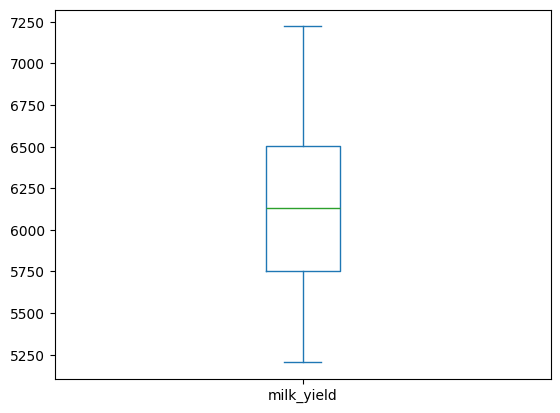

In [55]:
main_data.drop([16,16], inplace=True)
main_data.milk_yield.plot(kind='box');

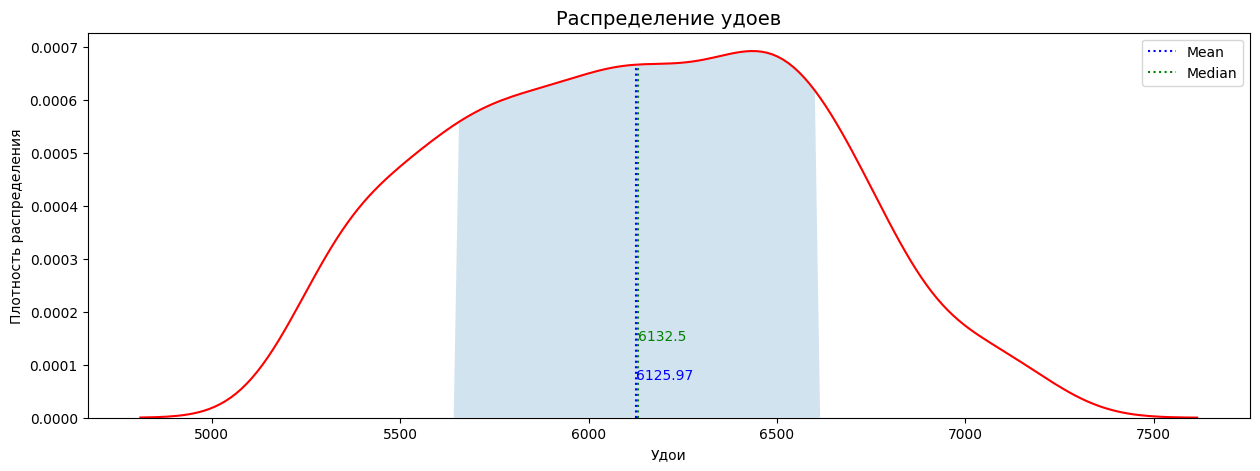

In [56]:
feature_distribution(main_data, 'milk_yield', "Распределение удоев", "Удои" )

#### Оценим влияние разных фактовров на удои

In [57]:
def feature_impact (df, values, col1, col2, form):
    if col2 is None:
        index = [col1]
    else:
        index = [col1, col2]
    table = df.pivot_table(index=index, values=[values], aggfunc=['mean', 'max', 'std', 'count'])\
                .sort_values(by=[('mean', values)])\
                .style.format(form)
    return table

##### Порода отца -> удои

In [58]:
feature_impact (main_data, 'milk_yield', 'dad_breed', None, '{:.0f}')

,mean,max,std,count
,milk_yield,milk_yield,milk_yield,milk_yield
dad_breed,,,,
РефлешнСоверинг,5937,6701,405,311
ВисБикАйдиал,6311,7222,468,317


##### Порода коровы -> удои

In [59]:
feature_impact (main_data, 'milk_yield','breed', None, '{:.0f}')

,mean,max,std,count
,milk_yield,milk_yield,milk_yield,milk_yield
breed,,,,
ВисБикАйдиал,6099,7222,462,372
РефлешнСоверинг,6165,7201,493,256


Из-за ошибки в записях породы получаем противоречащие данные, что порода отца "ВисБикАйдиал" более производительная, при этом порода коровы  "РефлешнСоверинг" показывает лучшее цифры удоев.

##### Пастбище -> удои

In [60]:
feature_impact (main_data, 'milk_yield','pasture', None, '{:.0f}')

,mean,max,std,count
,milk_yield,milk_yield,milk_yield,milk_yield
pasture,,,,
Равнинное,6056,6991,443,278
Холмистое,6181,7222,494,350


##### Возраст коровы -> удои

In [61]:
feature_impact (main_data, 'milk_yield','cow_age', None, '{:.0f}')

,mean,max,std,count
,milk_yield,milk_yield,milk_yield,milk_yield
cow_age,,,,
менее_2_лет,5444,6122,148,110
более_2_лет,6271,7222,387,518


### Изучим цифровые признаки питания

#### ЭКЕ

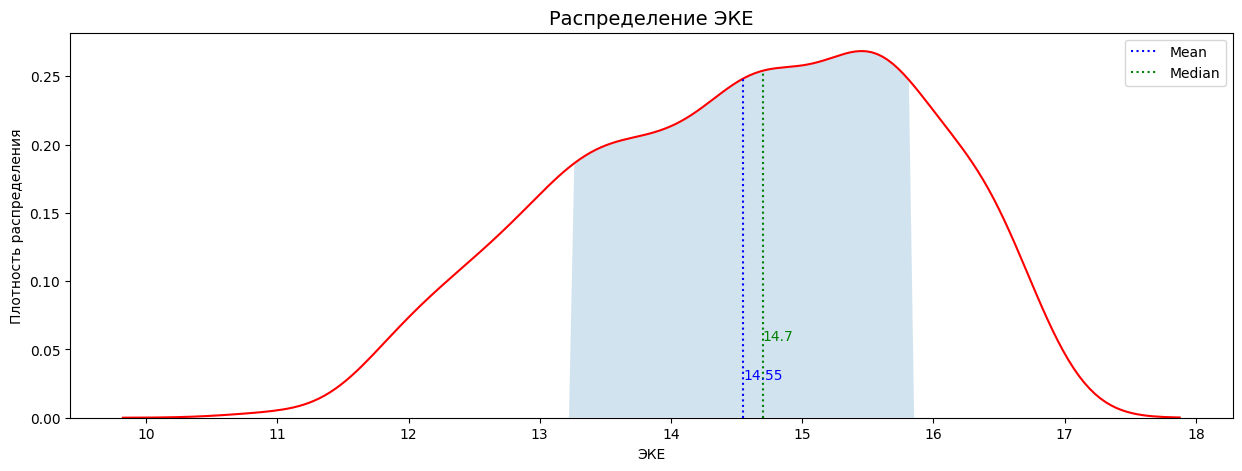

In [62]:
feature_distribution(main_data, 'EFU', "Распределение ЭКЕ", "ЭКЕ")

#### СПО

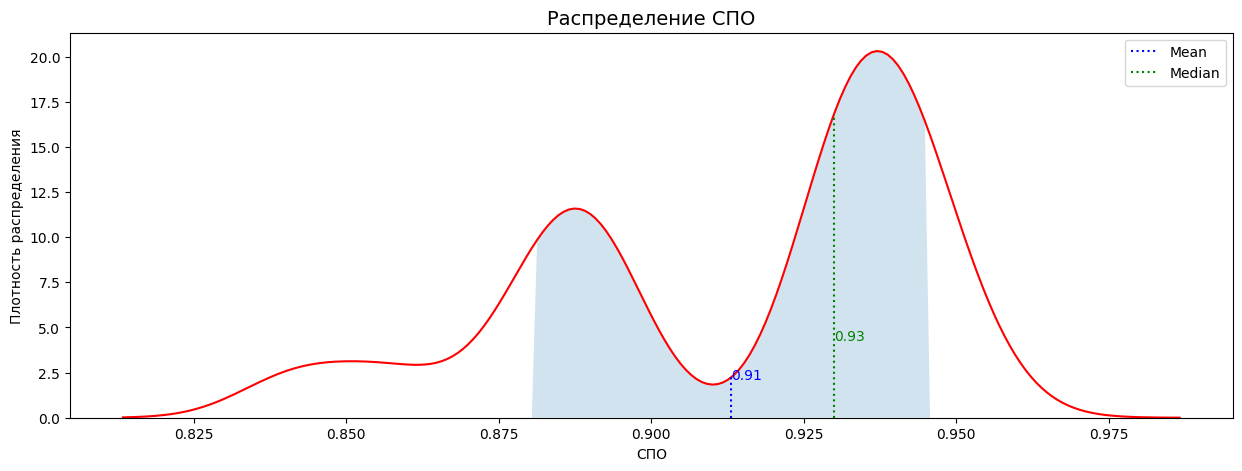

In [63]:
feature_distribution(main_data, 'SPR', "Распределение СПО", "СПО")

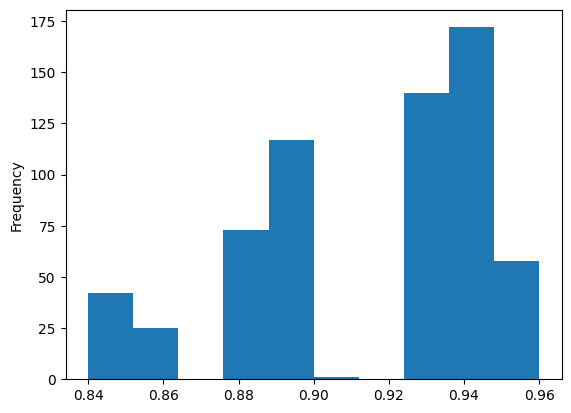

In [64]:
main_data.SPR.plot(kind='hist', bins=10);

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'> Примерно понимаю, но пока не доконцы разобрался. Почему модель лучше воспринимает разврывы в данных в в виде категориальных значений?</font>
</div>

#### Сырой протеин

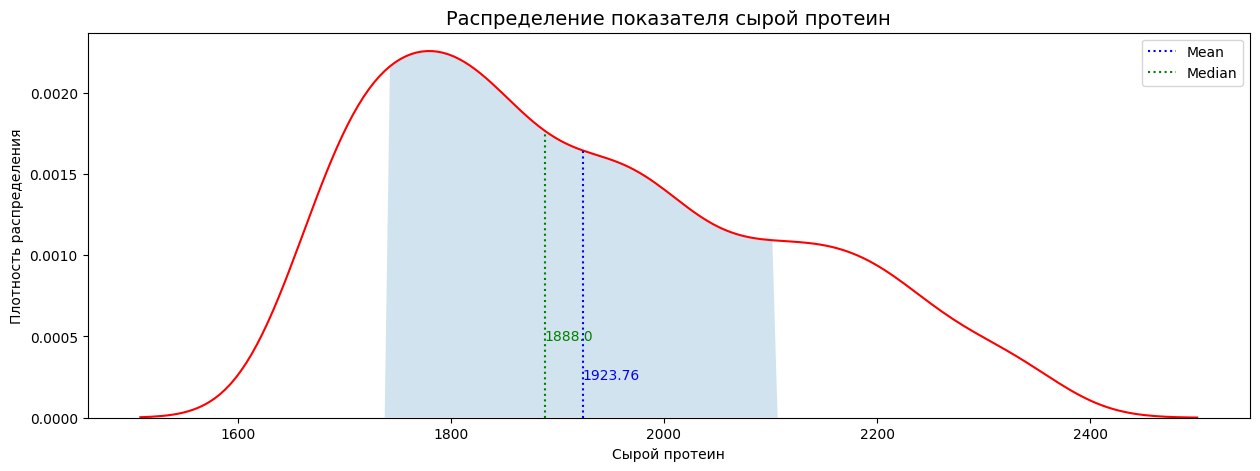

In [65]:
feature_distribution(main_data, 'feed_protein', "Распределение показателя сырой протеин", "Сырой протеин")

### <b>Изучим признак "вкус"</b> 

In [66]:
def pie_graph (df, col):
    pie = df[col].value_counts().reset_index(name='counts')
    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_axes([0,0,1,1])
    ax.pie(pie.counts, labels=pie[col], autopct='%1.1f%%')
    #ax.pie(pie.counts, labels=pie['index'], autopct='%1.1f%%')
    plt.show()

In [67]:
def pie_table (df, col):
    return pd.DataFrame(df[col]
                        .value_counts())\
                        .reset_index()\
                        .rename(columns={'count':'amount'})

#### Вкус

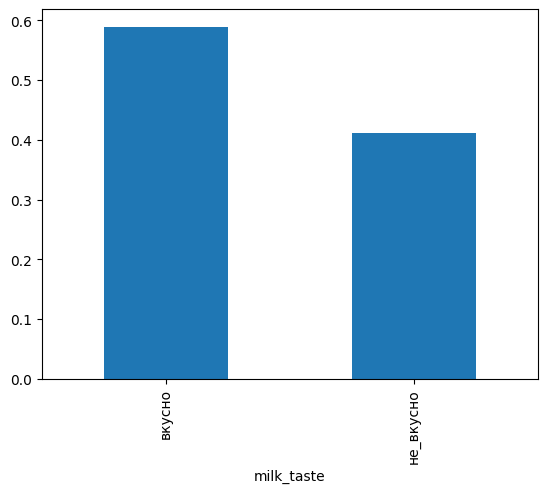

In [198]:
main_data.milk_taste.value_counts(normalize=True).plot(kind='bar');

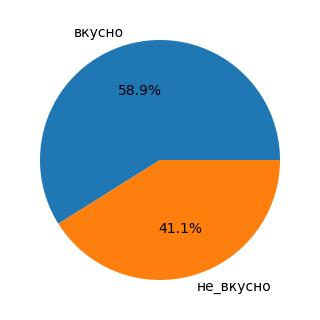

,milk_taste,amount
0,вкусно,370
1,не_вкусно,258


In [68]:
pie_graph(main_data, 'milk_taste')
pie_table(main_data, 'milk_taste')

#### Жирность

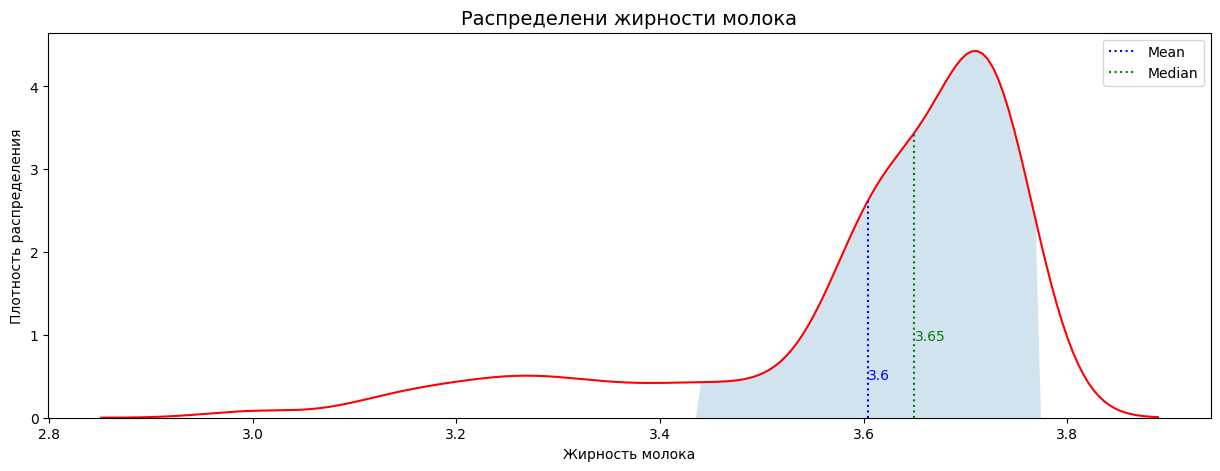

In [69]:
feature_distribution(main_data, 'milk_fat', "Распределени жирности молока", "Жирность молока")

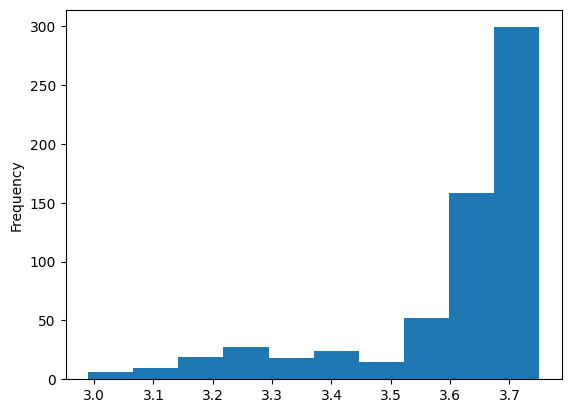

In [70]:
main_data['milk_fat'].plot(kind='hist', bins=10);

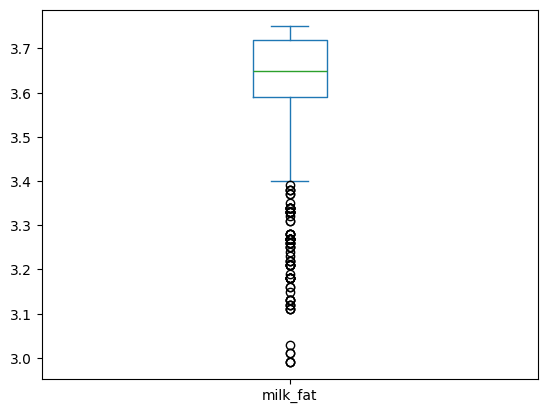

In [71]:
main_data.milk_fat.plot(kind='box');

In [72]:
feature_impact (main_data,  'milk_fat', 'milk_taste',  None, '{:.2f}')

,mean,max,std,count
,milk_fat,milk_fat,milk_fat,milk_fat
milk_taste,,,,
не_вкусно,3.59,3.74,0.17,258.00
вкусно,3.62,3.75,0.16,370.00


#### Протеин молока

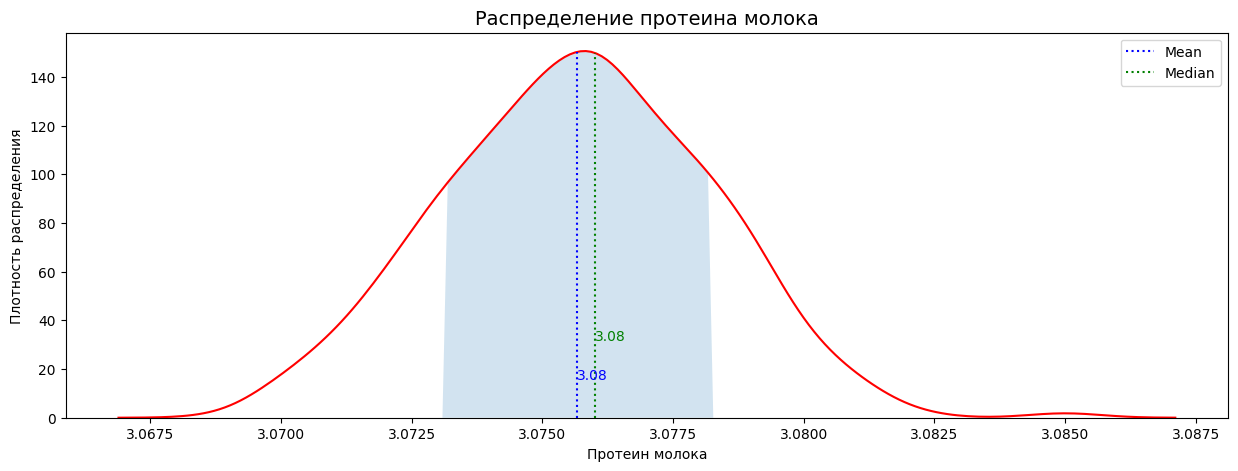

In [73]:
feature_distribution(main_data, 'milk_protein', "Распределение протеина молока", "Протеин молока")

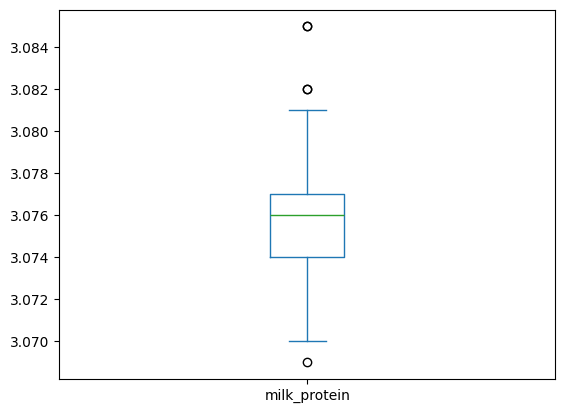

In [74]:
main_data.milk_protein.plot(kind='box');

In [75]:
feature_impact (main_data,  'milk_protein', 'milk_taste',  None, '{:.4f}')

,mean,max,std,count
,milk_protein,milk_protein,milk_protein,milk_protein
milk_taste,,,,
не_вкусно,3.0753,3.0810,0.0025,258.0000
вкусно,3.0759,3.0850,0.0025,370.0000


### Изучим категориальные признаки

#### Порода

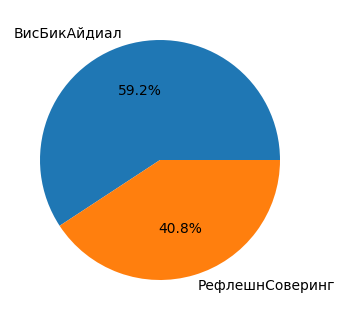

,breed,amount
0,ВисБикАйдиал,372
1,РефлешнСоверинг,256


In [76]:
pie_graph(main_data, 'breed')
pie_table(main_data, 'breed')

#### Порода отца

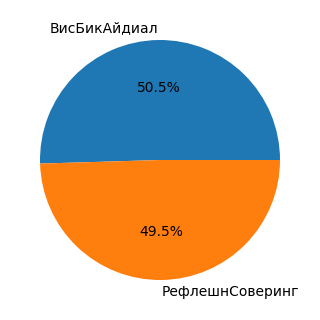

,dad_breed,amount
0,ВисБикАйдиал,317
1,РефлешнСоверинг,311


In [77]:
pie_graph(main_data, 'dad_breed')
pie_table(main_data, 'dad_breed')

#### Пастбище

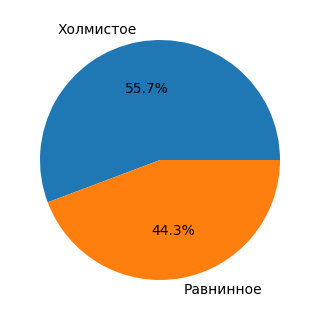

,pasture,amount
0,Холмистое,350
1,Равнинное,278


In [78]:
pie_graph(main_data, 'pasture')
pie_table(main_data, 'pasture')

#### Возраст коровы

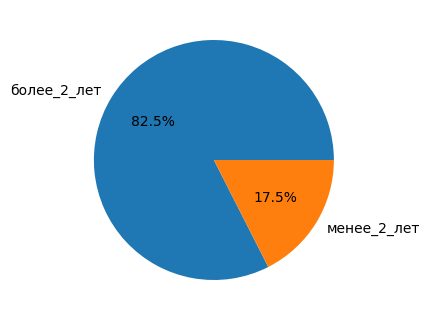

,cow_age,amount
0,более_2_лет,518
1,менее_2_лет,110


In [79]:
pie_graph(main_data, 'cow_age')
pie_table(main_data, 'cow_age')

### <b> Выводы. EDA.</b>

<b>Удои</b>
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>feature</th>
      <th>min</th>
      <th>max</th>
      <th>mean</th>
      <th>median</th>
      <th>std</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>milk_yield</td>
      <td>5204.0</td>
      <td>7222.0</td>
      <td>6125.968153</td>
      <td>6132.5</td>
      <td>475.857053</td>
    </tr>
  </tbody>
</table>
</div>


-   milk_yield - удалена строка с явным аномальным значением в `45616`, новая размерность (628, 12)
-   breed - более производительные коровы породы "ВисБикАйдиал"
-   dad_breed - более производительные коровы от отцов породы "РефлешнСоверинг"
-   есть несоответствие пород коров и пород отцов
-   pasture - более производительные коровы на холмистом выпасе
-   cow_age - более производительные коровы старше 2ух лет
-   SPR - распределение значений имеет дискретный характер

<b>Вкус</b>
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>milk_taste</th>
      <th>amount</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>вкусно</td>
      <td>370</td>
    </tr>
    <tr>
      <th>1</th>
      <td>не_вкусно</td>
      <td>258</td>
    </tr>
  </tbody>
</table>
</div>

-	milk_fat - вкусным оценивается молоко с более высоким содержанием жира
-   milk_protein - вкусным оценивается молоко с более высоким содержанием белка
-   milk_fat и milk_protein имеют много выбросов, но их нельзя считать аномальными

## Корреляционный анализ

<b>Корреляция признака "удои"</b>

In [80]:
feed_stat_multi = main_data.pivot_table(index='id',values=num_features, aggfunc='mean')

                   EFU       SPR  feed_protein  milk_fat  milk_protein  \
EFU           1.000000  0.741962      0.384747  0.686973     -0.013321   
SPR           0.741962  1.000000      0.485890  0.701044      0.109924   
feed_protein  0.384747  0.485890      1.000000  0.392822      0.229051   
milk_fat      0.686973  0.701044      0.392822  1.000000      0.043125   
milk_protein -0.013321  0.109924      0.229051  0.043125      1.000000   
milk_yield    0.765144  0.787904      0.437543  0.688506     -0.005701   

              milk_yield  
EFU             0.765144  
SPR             0.787904  
feed_protein    0.437543  
milk_fat        0.688506  
milk_protein   -0.005701  
milk_yield      1.000000  


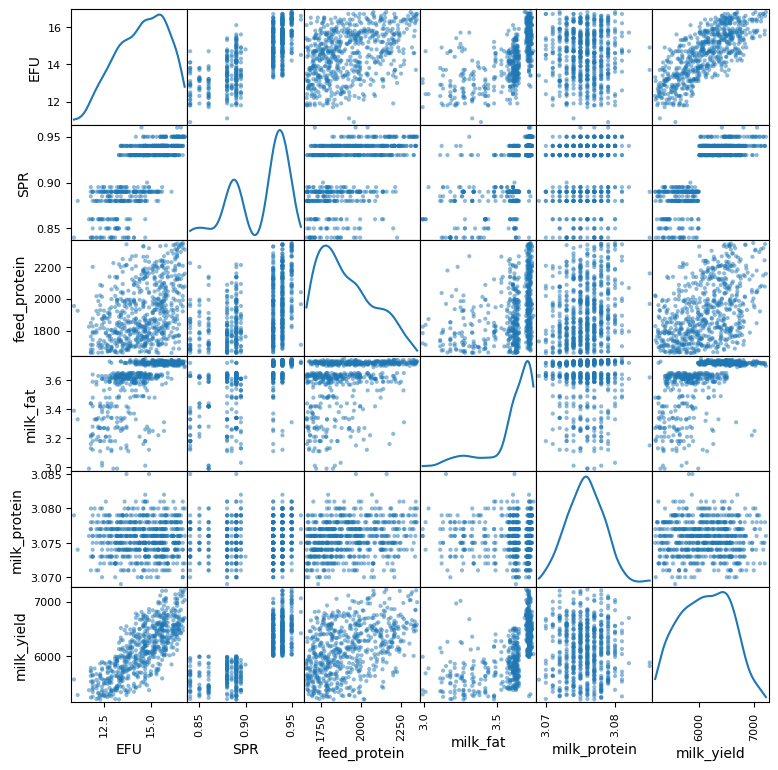

In [81]:
print(feed_stat_multi.corr(method='spearman'))
pd.plotting.scatter_matrix(feed_stat_multi, diagonal='kde', figsize=(9, 9)); 

In [82]:
print(feed_stat_multi.corr(method ='spearman'))
print(feed_stat_multi.corr(method ='kendall'))

                   EFU       SPR  feed_protein  milk_fat  milk_protein  \
EFU           1.000000  0.741962      0.384747  0.686973     -0.013321   
SPR           0.741962  1.000000      0.485890  0.701044      0.109924   
feed_protein  0.384747  0.485890      1.000000  0.392822      0.229051   
milk_fat      0.686973  0.701044      0.392822  1.000000      0.043125   
milk_protein -0.013321  0.109924      0.229051  0.043125      1.000000   
milk_yield    0.765144  0.787904      0.437543  0.688506     -0.005701   

              milk_yield  
EFU             0.765144  
SPR             0.787904  
feed_protein    0.437543  
milk_fat        0.688506  
milk_protein   -0.005701  
milk_yield      1.000000  
                   EFU       SPR  feed_protein  milk_fat  milk_protein  \
EFU           1.000000  0.578858      0.265449  0.506118     -0.009910   
SPR           0.578858  1.000000      0.357744  0.547567      0.083421   
feed_protein  0.265449  0.357744      1.000000  0.278582      0.161488

            milk_yield  milk_fat
milk_yield    1.000000  0.688506
milk_fat      0.688506  1.000000


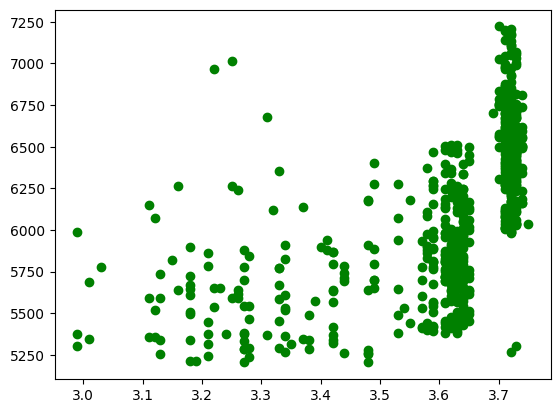

In [83]:
print(main_data[['milk_yield', 'milk_fat']].corr(method='spearman'))
plt.scatter(main_data['milk_fat'],
            main_data['milk_yield'],
            c='green');

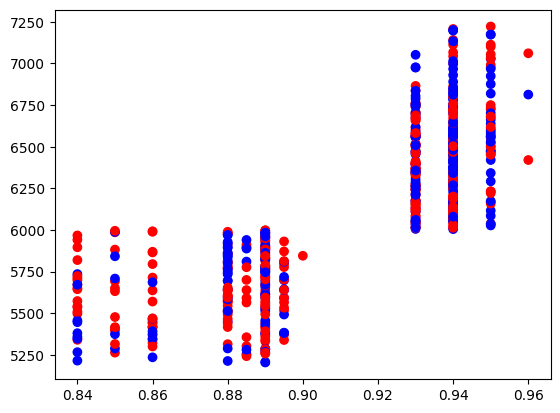

In [84]:
plt.scatter(main_data['SPR'],
            main_data['milk_yield'],
            c=main_data['breed'].map({'РефлешнСоверинг': 1,'ВисБикАйдиал': 0}),
            cmap='bwr_r');

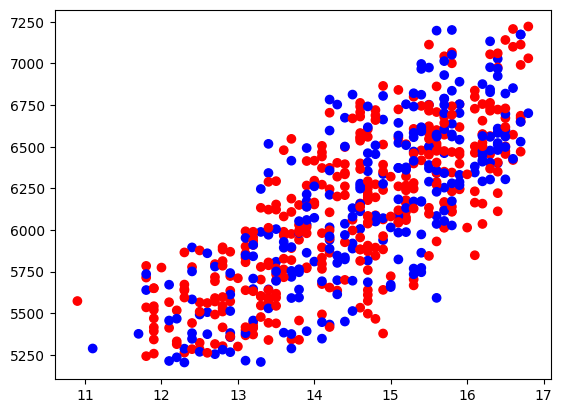

In [85]:
plt.scatter(main_data['EFU'],
            main_data['milk_yield'],
            c=main_data['breed'].map({'РефлешнСоверинг': 1,'ВисБикАйдиал': 0}),
            cmap='bwr_r');

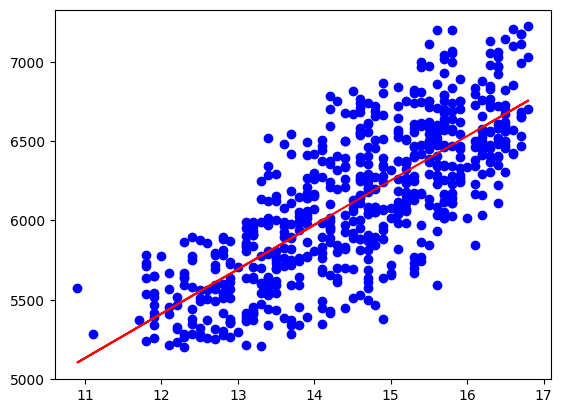

In [86]:
from scipy import stats
plt.scatter(main_data['EFU'],
            main_data['milk_yield'],
            c='blue')
slope,intercept,rvalue,pvalue,stderr = stats.linregress(main_data['EFU'],main_data['milk_yield'])
plt.plot(main_data['EFU'], slope*main_data['EFU']+intercept, c='r');

In [87]:
#plt.scatter(main_data['EFU_sqr'],
#            main_data['milk_yield'],
#            c='blue')
#slope,intercept,rvalue,pvalue,stderr = stats.linregress(main_data['EFU_sqr'],main_data['milk_yield'])
#plt.plot(main_data['EFU_sqr'], slope*main_data['EFU_sqr']+intercept, c='r');

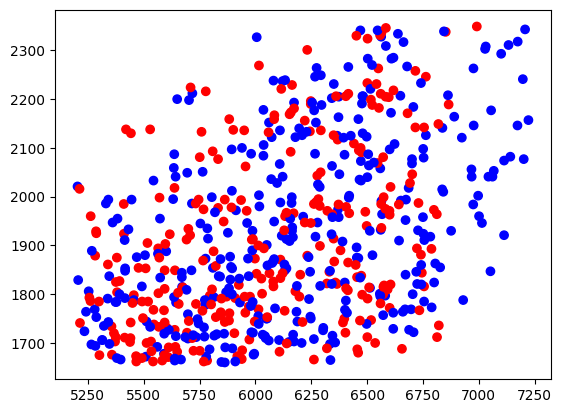

In [88]:
plt.scatter(main_data['milk_yield'],
            main_data['feed_protein'],
            c=main_data['pasture'].map({'Холмистое': 1,'Равнинное': 0}),
            cmap='bwr_r');

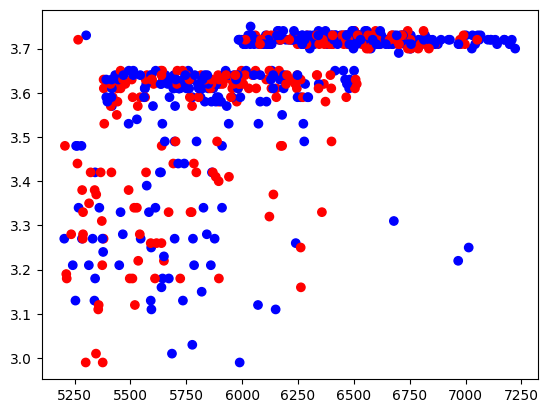

In [89]:
plt.scatter(main_data['milk_yield'],
            main_data['milk_fat'],
            c=main_data['milk_taste'].map({'вкусно': 1,'не_вкусно': 0}),
            cmap='bwr_r');

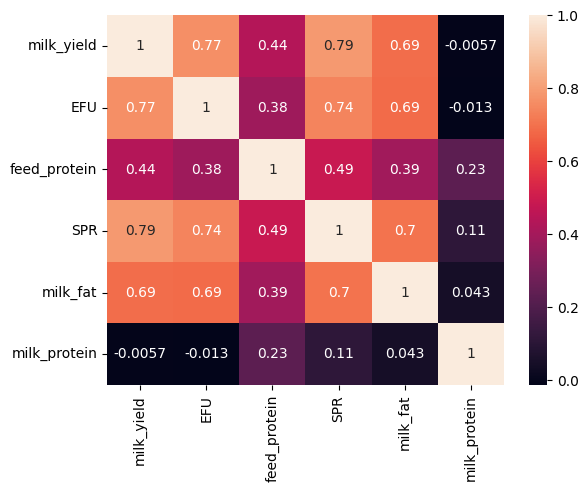

In [90]:
sns.heatmap(main_data[num_features].corr(method='spearman'), annot=True);

<b>Корреляция признака "вкус"</b>

In [91]:
feed_stat_multi = main_data.assign(milk_taste_bool = main_data['milk_taste']
                 .map({'вкусно': 1,'не_вкусно': 0}),
                dad_breed_bool = main_data['dad_breed']
                 .map({'ВисБикАйдиал': 1,'РефлешнСоверинг': 0}),
                pasture_bool = main_data['pasture']
                .map({'Равнинное': 1,'Холмистое': 0}),
                 cow_age_bool = main_data['cow_age']
                .map({'более_2_лет': 1,'менее_2_лет': 0}))\
                    .pivot_table(
                    index='id',
                    values=[*num_features,
                            'milk_taste_bool',
                            'dad_breed_bool',
                            'cow_age_bool'], aggfunc='mean')

Корреляция удой

In [92]:
feed_stat_multi.corr(method='spearman')[-1:].T.sort_values(by='milk_yield', ascending=False)

,milk_yield
milk_yield,1.000000
SPR,0.787904
EFU,0.765144
milk_fat,0.688506
cow_age_bool,0.647025
feed_protein,0.437543
dad_breed_bool,0.385846
milk_taste_bool,0.102273
milk_protein,-0.005701


Корреляция вкус

In [93]:
feed_stat_multi.corr(method='spearman')[-2:-1].T.sort_values(by='milk_taste_bool', ascending=False)

,milk_taste_bool
milk_taste_bool,1.000000
SPR,0.259041
EFU,0.225177
feed_protein,0.145765
milk_fat,0.135244
cow_age_bool,0.117584
milk_protein,0.115930
milk_yield,0.102273
dad_breed_bool,0.001505


Корреляция СПО

In [94]:
feed_stat_multi.corr(method='spearman')[1:2].T.sort_values(by='SPR', ascending=False)

,SPR
SPR,1.000000
milk_yield,0.787904
EFU,0.741962
milk_fat,0.701044
cow_age_bool,0.506498
feed_protein,0.485890
milk_taste_bool,0.259041
dad_breed_bool,0.166183
milk_protein,0.109924


Корреляция жирность

In [95]:
feed_stat_multi.corr(method='spearman')[-4:-3].T.sort_values(by='milk_fat', ascending=False)

,milk_fat
milk_fat,1.000000
SPR,0.701044
milk_yield,0.688506
EFU,0.686973
cow_age_bool,0.474238
feed_protein,0.392822
milk_taste_bool,0.135244
milk_protein,0.043125
dad_breed_bool,0.007479


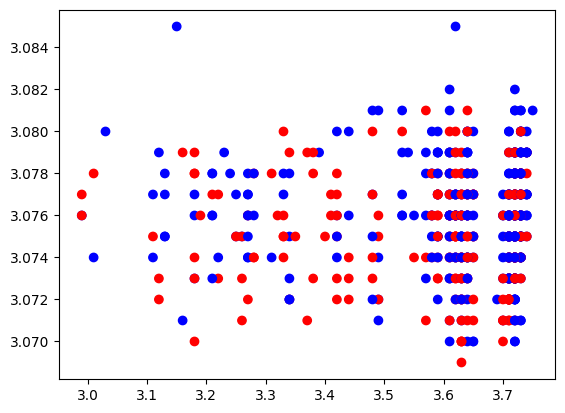

In [96]:
plt.scatter(main_data['milk_fat'],
            main_data['milk_protein'],
            c=main_data['milk_taste'].map({'вкусно': 1,'не_вкусно': 0}),
            cmap='bwr_r');

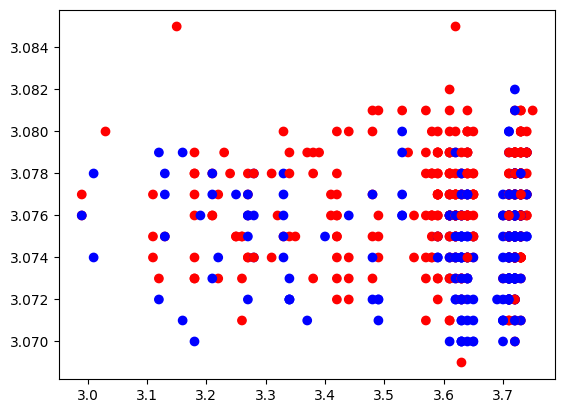

In [97]:
plt.scatter(main_data['milk_fat'],
            main_data['milk_protein'],
            c=main_data['breed'].map({'РефлешнСоверинг': 1,'ВисБикАйдиал': 0}),
            cmap='bwr_r');

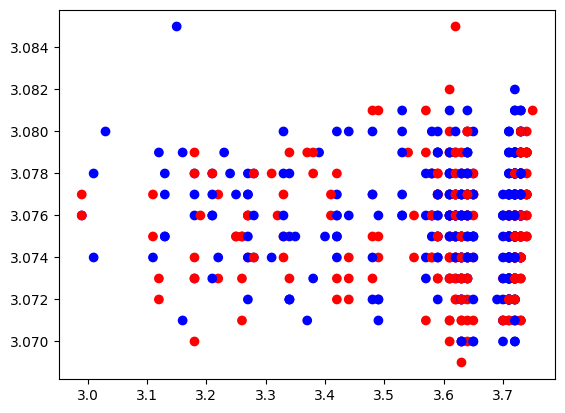

In [98]:
plt.scatter(main_data['milk_fat'],
            main_data['milk_protein'],
            c=main_data['pasture'].map({'Холмистое': 1,'Равнинное': 0}),
            cmap='bwr_r');

### <b> Выводы. Корреляции.</b>

1й входной признак - `milk_yield`
- `EFU` - высокая прямая связь 
- `SPR` - высокая прямая нелинейная связь
- `milk_fat` - заметная прямая связь
- между `EFU` и `SPR` наблюдается мультиколлинеарность

2й входной признак - `milk_taste`
- не имеет линейных связей

## Предсказание надоев. Линейная регрессия.

### 1я модель линейной регрессии

In [99]:
X = main_data.drop(['id', 'milk_yield', 'milk_taste', 'milk_fat', 'milk_protein'], axis=1)
y = main_data['milk_yield']

In [100]:
feed_stat_multi.corr(method='spearman')[-1:].T.sort_values(by='milk_yield', ascending=False)

,milk_yield
milk_yield,1.000000
SPR,0.787904
EFU,0.765144
milk_fat,0.688506
cow_age_bool,0.647025
feed_protein,0.437543
dad_breed_bool,0.385846
milk_taste_bool,0.102273
milk_protein,-0.005701


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [102]:
print(X_train.shape)
print(X_test.shape)

(471, 7)
(157, 7)


In [103]:
#encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

In [104]:
cat_features = X.select_dtypes(include='object').columns

In [105]:
X_train_ohe = encoder.fit_transform(X_train[cat_features])
X_test_ohe = encoder.transform(X_test[cat_features])

In [106]:
#encoder_col_names = encoder.get_feature_names()
encoder_col_names = encoder.get_feature_names_out()

In [107]:
scaler = StandardScaler()

In [108]:
num_features = X.select_dtypes(exclude='object').columns

In [109]:
X_train_scaled = scaler.fit_transform(X_train[num_features])
X_test_scaled = scaler.transform(X_test[num_features])

In [110]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [111]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_features)

In [112]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

### Оценим разброс признаков

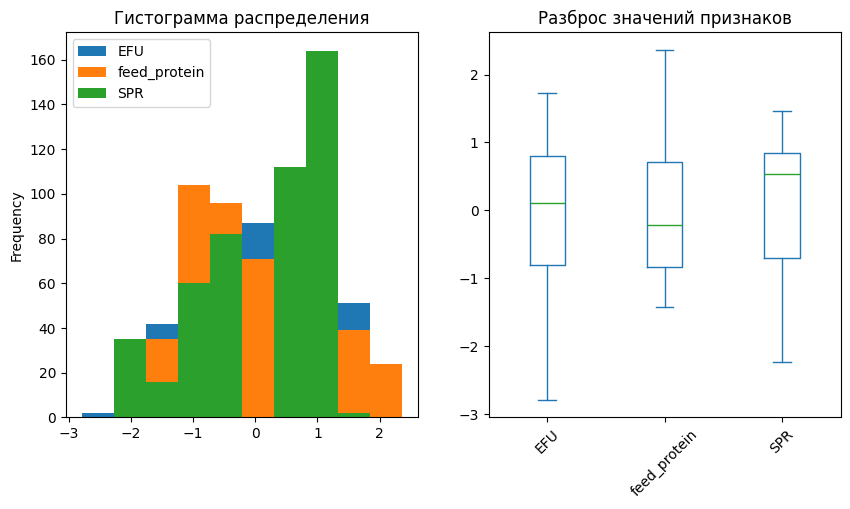

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
X_train[num_features].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_features].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [114]:
model_lr = LinearRegression()

In [115]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [116]:
predictions = model_lr.predict(X_test)

In [117]:
mse = mean_squared_error(y_test, predictions)
rmse = mse**0.5
mae = mean_absolute_error(y_test, predictions)
R2_score = r2_score(y_test, predictions)

In [118]:
print(f'MSE = {mse:.0f}')
print(f'RMSE = {rmse:.0f}')
print(f'MAE = {mae:.0f}')
print(f'R2 = {R2_score:.2f}')

MSE = 51419
RMSE = 227
MAE = 179
R2 = 0.80


### Анализ остатков

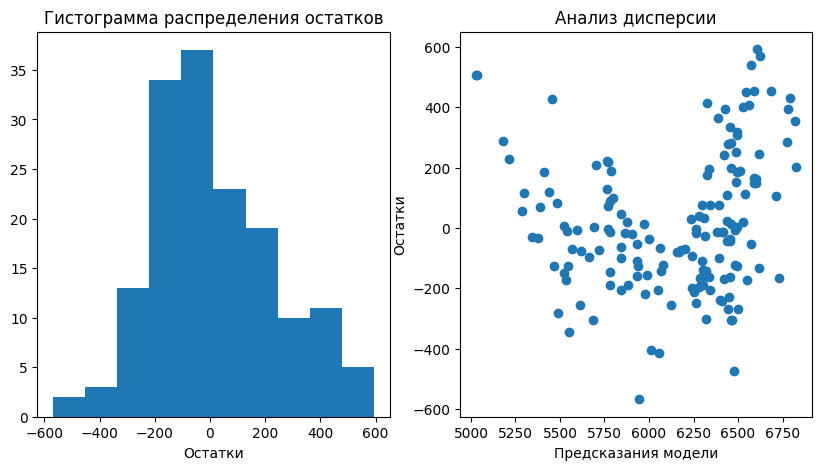

In [119]:
residuals = (y_test - predictions)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

## Настройка модели

### 2я модель линейной регрессии

In [120]:
main_data['SPR_cat'] = main_data.SPR.apply(lambda x: 0 if x < 0.91 else 1)
main_data[['milk_yield', 'SPR_cat']].corr()

,milk_yield,SPR_cat
milk_yield,1.000000,0.834243
SPR_cat,0.834243,1.000000


In [121]:
main_data['EFU_sqr'] = main_data.EFU.apply(lambda x: x**2)
main_data[['milk_yield', 'EFU_sqr']].corr()

,milk_yield,EFU_sqr
milk_yield,1.00000,0.76553
EFU_sqr,0.76553,1.00000


In [122]:
X2 = main_data.drop(['id', 'milk_yield', 'milk_taste', 'milk_fat', 'milk_protein'], axis=1)
y2 = main_data['milk_yield']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=RANDOM_STATE)

In [123]:
scaler = StandardScaler()

#encoder = OneHotEncoder(drop='first', sparse=False)
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

X2_train_ohe = encoder.fit_transform(X2_train[X2.select_dtypes(include=['object']).columns])
X2_test_ohe = encoder.transform(X2_test[X2.select_dtypes(include=['object']).columns])

#encoder_col_names = encoder.get_feature_names()
encoder_col_names = encoder.get_feature_names_out()

X2_train_scaled = scaler.fit_transform(X2_train[X2.select_dtypes(exclude=['object']).columns])
X2_test_scaled = scaler.transform(X2_test[X2.select_dtypes(exclude=['object']).columns])

X2_train_ohe = pd.DataFrame(X2_train_ohe, columns=encoder_col_names)
X2_test_ohe = pd.DataFrame(X2_test_ohe, columns=encoder_col_names)

X2_train_scaled = pd.DataFrame(X2_train_scaled, columns=X2.select_dtypes(exclude=['object']).columns)
X2_test_scaled = pd.DataFrame(X2_test_scaled, columns=X2.select_dtypes(exclude=['object']).columns)

X2_train = pd.concat([X2_train_ohe, X2_train_scaled], axis=1)
X2_test = pd.concat([X2_test_ohe, X2_test_scaled], axis=1)

In [124]:
model_lr.fit(X2_train, y2_train)
predictions2 = model_lr.predict(X2_test)

In [125]:
mse2 = mean_squared_error(y2_test, predictions2)
rmse2 = mse2**0.5
mae2 = mean_absolute_error(y2_test, predictions2)
R2_2_score = r2_score(y2_test, predictions2)

In [126]:
print(f'MSE2 = {mse2:.0f}')
print(f'RMSE2 = {rmse2:.0f}')
print(f'MAE2 = {mae2:.0f}')
print(f'R2_2 = {R2_2_score:.2f}')

MSE2 = 44556
RMSE2 = 211
MAE2 = 165
R2_2 = 0.83


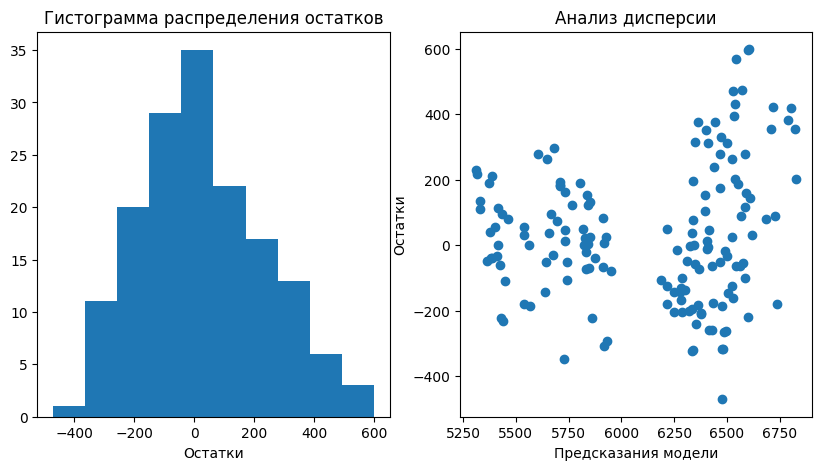

In [127]:
residuals2 = (y2_test - predictions2)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals2)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[1].scatter(predictions2, residuals2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

### 3я модель линейной регрессии

Объединим данные main_data и dad_data

In [128]:
print(main_data.shape)
print(dad_data.shape)

(628, 14)
(629, 2)


Т.к. мы удалили 1 строчку с выбросом в основном датасете, нужно убрать строчку с id = 17 и в датасете dad_name

In [129]:
dad_data.query('id == 17')

,id,dad_name
16,17,Буйный


In [130]:
dad_data.drop([16,16], inplace=True)

In [131]:
print(main_data.shape)
print(dad_data.shape)

(628, 14)
(628, 2)


In [132]:
df = main_data.merge(dad_data, on=['id'], how='left')

In [133]:
print(df.shape)
df.head(1)

(628, 15)


,id,milk_yield,EFU,feed_protein,SPR,breed,pasture,dad_breed,milk_fat,milk_protein,milk_taste,cow_age,SPR_cat,EFU_sqr,dad_name
0,1,5863.0,14.2,1743.0,0.89,ВисБикАйдиал,Равнинное,ВисБикАйдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный


Проверим соотнесение породы и имен отцов

In [134]:
df.pivot_table(index=['dad_name', 'dad_breed'], values=['milk_yield'], aggfunc=['count'])

count
                         milk_yield
dad_name dad_breed                 
Барин    ВисБикАйдиал            28
         РефлешнСоверинг        212
Буйный   ВисБикАйдиал           214
Геркулес ВисБикАйдиал            64
Соловчик ВисБикАйдиал            11
         РефлешнСоверинг         99

Судя по соотношению "Барин" и "Соловчик" относяться к породе "РефлешнСоверинг"

In [135]:
df.loc[(df.loc[:,'dad_breed'] == "ВисБикАйдиал") & (df.loc[:,'dad_name'] == "Барин"), 'dad_breed'] = "РефлешнСоверинг"
df.loc[(df.loc[:,'dad_breed'] == "ВисБикАйдиал") & (df.loc[:,'dad_name'] == "Соловчик"), 'dad_breed'] = "РефлешнСоверинг"

In [136]:
df.pivot_table(index=['dad_name', 'dad_breed'], values=['milk_yield'], aggfunc=['count'])

,,count
,,milk_yield
dad_name,dad_breed,
Барин,РефлешнСоверинг,240
Буйный,ВисБикАйдиал,214
Геркулес,ВисБикАйдиал,64
Соловчик,РефлешнСоверинг,110


In [137]:
df['SPR_cat'] = df.SPR.apply(lambda x: 0 if x < 0.91 else 1)

In [138]:
df['EFU_sqr'] = df.EFU.apply(lambda x: x**2)

In [139]:
X3 = df.drop(['id', 'milk_yield', 'breed', 'dad_name', 'milk_taste'], axis=1)
y3 = df['milk_yield']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=RANDOM_STATE)

In [140]:
#encoder = OneHotEncoder(drop='first', sparse=False)
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

X3_train_ohe = encoder.fit_transform(X3_train[X3.select_dtypes(include=['object']).columns])
X3_test_ohe = encoder.transform(X3_test[X3.select_dtypes(include=['object']).columns])

#encoder_col_names = encoder.get_feature_names()
encoder_col_names = encoder.get_feature_names_out()

In [141]:
scaler = StandardScaler()
X3_train_scaled = scaler.fit_transform(X3_train[X3.select_dtypes(exclude=['object']).columns])
X3_test_scaled = scaler.transform(X3_test[X3.select_dtypes(exclude=['object']).columns])

X3_train_ohe = pd.DataFrame(X3_train_ohe, columns=encoder_col_names)
X3_test_ohe = pd.DataFrame(X3_test_ohe, columns=encoder_col_names)

X3_train_scaled = pd.DataFrame(X3_train_scaled, columns=X3.select_dtypes(exclude=['object']).columns)
X3_test_scaled = pd.DataFrame(X3_test_scaled, columns=X3.select_dtypes(exclude=['object']).columns)

X3_train = pd.concat([X3_train_ohe, X3_train_scaled], axis=1)
X3_test = pd.concat([X3_test_ohe, X3_test_scaled], axis=1)

model_lr.fit(X3_train, y3_train)
predictions3 = model_lr.predict(X3_test)

mse3 = mean_squared_error(y3_test, predictions3)
rmse3 = mse3**0.5
mae3 = mean_absolute_error(y3_test, predictions3)
R2_3_score = r2_score(y3_test, predictions3)

print(f'MSE3 = {mse3:.0f}')
print(f'RMSE3 = {rmse3:.0f}')
print(f'MAE3 = {mae3:.0f}')
print(f'R2_3 = {R2_3_score:.2f}')

MSE3 = 36635
RMSE3 = 191
MAE3 = 151
R2_3 = 0.86


In [142]:
df.pivot_table(index=['dad_breed', 'dad_name', 'breed'], values='id', aggfunc='count')

id
dad_breed       dad_name breed               
ВисБикАйдиал    Буйный   ВисБикАйдиал     127
                         РефлешнСоверинг   87
                Геркулес ВисБикАйдиал      54
                         РефлешнСоверинг   10
РефлешнСоверинг Барин    ВисБикАйдиал     110
                         РефлешнСоверинг  130
                Соловчик ВисБикАйдиал      81
                         РефлешнСоверинг   29

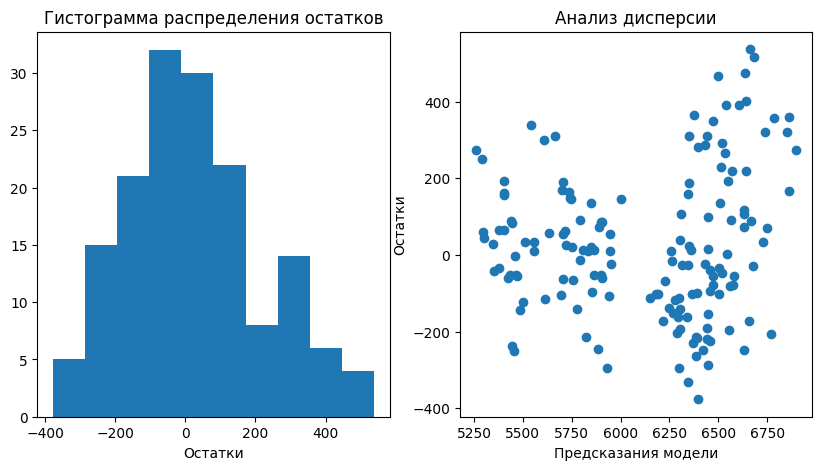

In [143]:
residuals3 = (y3_test - predictions3)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals3)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[1].scatter(predictions3, residuals3)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

## Прогноз удои.

In [144]:
buy_data.pivot_table(index=['dad_name', 'dad_breed'], values='milk_fat', aggfunc='count')

milk_fat
dad_name dad_breed                
Барин    РефлешнСоверинг         4
Буйный   ВисБикАйдиал            5
         РефлешнСоверинг         3
Геркулес ВисБикАйдиал            3
         РефлешнСоверинг         3
Соловчик РефлешнСоверинг         2

In [145]:
buy_data.loc[(buy_data.loc[:,'dad_breed'] == "РефлешнСоверинг")\
             & (buy_data.loc[:,'dad_name'] == "Буйный"), 'dad_breed'] = "ВисБикАйдиал"
buy_data.loc[(buy_data.loc[:,'dad_breed'] == "РефлешнСоверинг")\
             & (buy_data.loc[:,'dad_name'] == "Геркулес"), 'dad_breed'] = "ВисБикАйдиал"

In [146]:
buy_data.pivot_table(index=['dad_name', 'dad_breed'], values='milk_fat', aggfunc='count')

,,milk_fat
dad_name,dad_breed,
Барин,РефлешнСоверинг,4
Буйный,ВисБикАйдиал,8
Геркулес,ВисБикАйдиал,6
Соловчик,РефлешнСоверинг,2


In [147]:
buy_data[['EFU', 'SPR','feed_protein']] = None

In [148]:
EFU_mean_plus = round(df.EFU.mean() + df.EFU.mean()*0.05, 1)
SPR_mean_plus = round(df.SPR.mean() + df.SPR.mean()*0.05, 2)
feed_protein_mean_plus = round(df.feed_protein.mean() + df.feed_protein.mean()*0.05, 0)

In [149]:
buy_data['EFU'].fillna(EFU_mean_plus, inplace=True)
buy_data['SPR'].fillna(SPR_mean_plus, inplace=True)
buy_data['feed_protein'].fillna(feed_protein_mean_plus, inplace=True)
buy_data.head(1)

,breed,pasture,dad_breed,dad_name,milk_fat,milk_protein,cow_age,EFU,SPR,feed_protein
0,ВисБикАйдиал,Холмистое,ВисБикАйдиал,Геркулес,3.58,3.076,более_2_лет,15.3,0.96,2020.0


In [150]:
buy_data['SPR_cat'] = 1
buy_data['EFU_sqr'] = buy_data.EFU**2

In [151]:
buy_data.head(1)

,breed,pasture,dad_breed,dad_name,milk_fat,milk_protein,cow_age,EFU,SPR,feed_protein,SPR_cat,EFU_sqr
0,ВисБикАйдиал,Холмистое,ВисБикАйдиал,Геркулес,3.58,3.076,более_2_лет,15.3,0.96,2020.0,1,234.09


In [152]:
X4 = buy_data.drop(['breed', 'dad_name'], axis=1)
X4 = X4[X3.columns]
X4.head(1)


,EFU,feed_protein,SPR,pasture,dad_breed,milk_fat,milk_protein,cow_age,SPR_cat,EFU_sqr
0,15.3,2020.0,0.96,Холмистое,ВисБикАйдиал,3.58,3.076,более_2_лет,1,234.09


In [153]:
X3.head(1)

,EFU,feed_protein,SPR,pasture,dad_breed,milk_fat,milk_protein,cow_age,SPR_cat,EFU_sqr
0,14.2,1743.0,0.89,Равнинное,ВисБикАйдиал,3.58,3.076,более_2_лет,0,201.64


In [154]:
X4_test_ohe = encoder.transform(X4[X4.select_dtypes(include=['object']).columns])

In [155]:
#encoder_col_names = encoder.get_feature_names()
encoder_col_names = encoder.get_feature_names_out()

In [156]:
X4_test_scaled = scaler.transform(X4[X4.select_dtypes(exclude=['object']).columns])

In [157]:
X4_test_ohe = pd.DataFrame(X4_test_ohe, columns=encoder_col_names)

In [158]:
X4_test_scaled = pd.DataFrame(X4_test_scaled, columns=X4.select_dtypes(exclude=['object']).columns)

In [159]:
X4_test = pd.concat([X4_test_ohe, X4_test_scaled], axis=1)

In [160]:
predictions4 = model_lr.predict(X4_test)

In [161]:
buy_data['milk_yield'] = predictions4


In [162]:
buy_data[list(buy_data.columns)[-1:] + list(buy_data.columns)[:-1]]\
.sort_values(by='milk_yield', ascending=False)

,milk_yield,breed,pasture,dad_breed,dad_name,milk_fat,milk_protein,cow_age,EFU,SPR,feed_protein,SPR_cat,EFU_sqr
12,6854.949359,ВисБикАйдиал,Холмистое,ВисБикАйдиал,Геркулес,3.68,3.046,более_2_лет,15.3,0.96,2020.0,1,234.09
3,6656.758868,РефлешнСоверинг,Холмистое,ВисБикАйдиал,Буйный,3.40,3.061,более_2_лет,15.3,0.96,2020.0,1,234.09
15,6618.996303,РефлешнСоверинг,Холмистое,ВисБикАйдиал,Буйный,3.40,3.065,более_2_лет,15.3,0.96,2020.0,1,234.09
10,6556.835331,ВисБикАйдиал,Холмистое,РефлешнСоверинг,Соловчик,3.73,3.055,более_2_лет,15.3,0.96,2020.0,1,234.09
11,6555.053536,РефлешнСоверинг,Равнинное,ВисБикАйдиал,Геркулес,3.73,3.073,более_2_лет,15.3,0.96,2020.0,1,234.09
6,6551.522663,ВисБикАйдиал,Холмистое,ВисБикАйдиал,Геркулес,3.58,3.076,более_2_лет,15.3,0.96,2020.0,1,234.09
0,6551.522663,ВисБикАйдиал,Холмистое,ВисБикАйдиал,Геркулес,3.58,3.076,более_2_лет,15.3,0.96,2020.0,1,234.09
4,6527.426187,РефлешнСоверинг,Равнинное,ВисБикАйдиал,Буйный,3.64,3.074,более_2_лет,15.3,0.96,2020.0,1,234.09
19,6527.426187,РефлешнСоверинг,Равнинное,ВисБикАйдиал,Буйный,3.64,3.074,более_2_лет,15.3,0.96,2020.0,1,234.09
18,6514.007034,ВисБикАйдиал,Равнинное,ВисБикАйдиал,Буйный,3.34,3.069,более_2_лет,15.3,0.96,2020.0,1,234.09


## Прогноз вкус.

In [163]:
df.head()

,id,milk_yield,EFU,feed_protein,SPR,breed,pasture,dad_breed,milk_fat,milk_protein,milk_taste,cow_age,SPR_cat,EFU_sqr,dad_name
0,1,5863.0,14.2,1743.0,0.890,ВисБикАйдиал,Равнинное,ВисБикАйдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529.0,12.8,2138.0,0.890,ВисБикАйдиал,Равнинное,РефлешнСоверинг,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810.0,14.0,1854.0,0.885,РефлешнСоверинг,Холмистое,РефлешнСоверинг,3.59,3.074,не_вкусно,более_2_лет,0,196.00,Барин
3,4,5895.0,12.4,2012.0,0.885,РефлешнСоверинг,Холмистое,ВисБикАйдиал,3.40,3.075,не_вкусно,более_2_лет,0,153.76,Буйный
4,5,5302.0,12.8,1675.0,0.885,ВисБикАйдиал,Равнинное,РефлешнСоверинг,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


In [164]:
df['milk_taste'] = df['milk_taste'].map({'вкусно': 1,'не_вкусно': 0})

In [165]:
X5 = df.drop(['id', 'breed', 'milk_taste'], axis=1)
y5 = df['milk_taste']
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, random_state=RANDOM_STATE)

In [166]:
print(X5_train.shape)
print(X5_test.shape)

(471, 12)
(157, 12)


In [167]:
print(y5_train.shape)
print(y5_test.shape)

(471,)
(157,)


In [168]:
#encoder = OneHotEncoder(drop='first', sparse=False)
encoder = OneHotEncoder(drop='first', sparse_output=False)

X5_train_ohe = encoder.fit_transform(X5_train[X5.select_dtypes(include=['object']).columns])
X5_test_ohe = encoder.transform(X5_test[X5.select_dtypes(include=['object']).columns])

#encoder_col_names = encoder.get_feature_names()
encoder_col_names = encoder.get_feature_names_out()

In [169]:
X5_train_ohe.shape

(471, 6)

In [170]:
X5_test_ohe.shape

(157, 6)

In [171]:
scaler = StandardScaler()

X5_train_scaled = scaler.fit_transform(X5_train[X5.select_dtypes(exclude=['object']).columns])
X5_test_scaled = scaler.transform(X5_test[X5.select_dtypes(exclude=['object']).columns])

In [172]:
X5_train_scaled.shape

(471, 8)

In [173]:
X5_test_scaled.shape

(157, 8)

In [174]:
X5_train_ohe = pd.DataFrame(X5_train_ohe, columns=encoder_col_names)
X5_test_ohe = pd.DataFrame(X5_test_ohe, columns=encoder_col_names)

In [175]:
X5_train_scaled = pd.DataFrame(X5_train_scaled, columns=X5.select_dtypes(exclude=['object']).columns)
X5_test_scaled = pd.DataFrame(X5_test_scaled, columns=X5.select_dtypes(exclude=['object']).columns)

In [176]:
X5_train = pd.concat([X5_train_ohe, X5_train_scaled], axis=1)
X5_test = pd.concat([X5_test_ohe, X5_test_scaled], axis=1)

In [177]:
print(X5_train.shape)
X5_train.head(1)

(471, 14)


,pasture_Холмистое,dad_breed_РефлешнСоверинг,cow_age_менее_2_лет,dad_name_Буйный,dad_name_Геркулес,dad_name_Соловчик,milk_yield,EFU,feed_protein,SPR,milk_fat,milk_protein,SPR_cat,EFU_sqr
0,1.0,1.0,0.0,0.0,0.0,1.0,0.550164,0.421188,1.340604,0.842883,0.756803,0.127541,0.833213,0.389455


In [178]:
print(X5_test.shape)
X5_test.head(1)

(157, 14)


,pasture_Холмистое,dad_breed_РефлешнСоверинг,cow_age_менее_2_лет,dad_name_Буйный,dad_name_Геркулес,dad_name_Соловчик,milk_yield,EFU,feed_protein,SPR,milk_fat,milk_protein,SPR_cat,EFU_sqr
0,1.0,0.0,0.0,1.0,0.0,0.0,1.133458,0.421188,-0.048518,0.842883,0.637047,0.127541,0.833213,0.389455


In [179]:
clf = LogisticRegression()

In [180]:
clf = clf.fit(X5_train, y5_train) 

In [181]:
y5_pred = clf.predict(X5_test)

In [182]:
accuracy = accuracy_score(y5_test, y5_pred)
recall = recall_score(y5_test, y5_pred)
precision = precision_score(y5_test, y5_pred)

print('accuracy: ', round(accuracy, 3))
print('recall: ',  round(recall, 3))
print('precision: ', round(precision, 3))

accuracy:  0.739
recall:  0.806
precision:  0.798


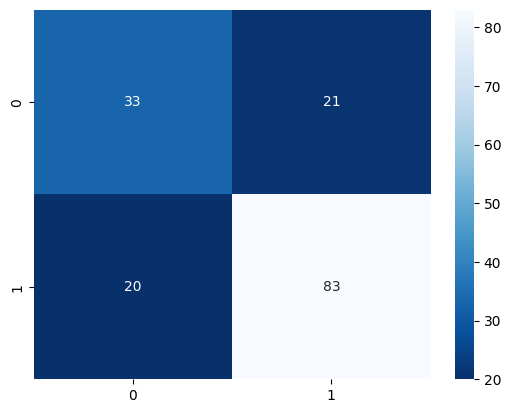

In [183]:
cm = confusion_matrix(y5_test, y5_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

Т.к. для фермера важен признак молоко вкусное, то нам важно уменьшить количество ложно положительных предсказаний, а значит будем максимизировать показатель precision

In [184]:
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 10,endpoint=False)]
precision_log = []
for i in thresholds:
    predictions = np.where(clf.predict_proba(X5_test)[:,1] > i, 1, 0)
    ac_score = accuracy_score(y5_test, predictions)
    pr_score = precision_score(y5_test, predictions)
    precision_log.append([i, ac_score, pr_score])
precision_log = pd.DataFrame(precision_log)
precision_log.columns = ['treshold','accuracy','precision']
                   

In [185]:
precision_log

,treshold,accuracy,precision
0,0.10,0.668790,0.664516
1,0.19,0.681529,0.675497
2,0.28,0.675159,0.675676
3,0.37,0.726115,0.723881
4,0.46,0.745223,0.769231
5,0.55,0.707006,0.806452
6,0.64,0.605096,0.859649
7,0.73,0.490446,0.848485
8,0.82,0.420382,1.000000
9,0.91,0.350318,1.000000


Оптимальные пороговые значения для модели 0,46 - 0,55 
- `accuracy`  0.75-0.70
- `precision` 0.77-0.81

In [186]:
custom_threshold = 0.82
treshold = (clf.predict_proba(X5_test)[:,1] >= custom_threshold).astype(int)
accuracy = (treshold == y5_test).mean()
precision = precision_score(y5_test, treshold).mean()
print(f"Accuracy with custom threshold {custom_threshold}: {accuracy:.2f}")
print(f"Precision with custom threshold {custom_threshold}: {precision:.2f}")

Accuracy with custom threshold 0.82: 0.42
Precision with custom threshold 0.82: 1.00


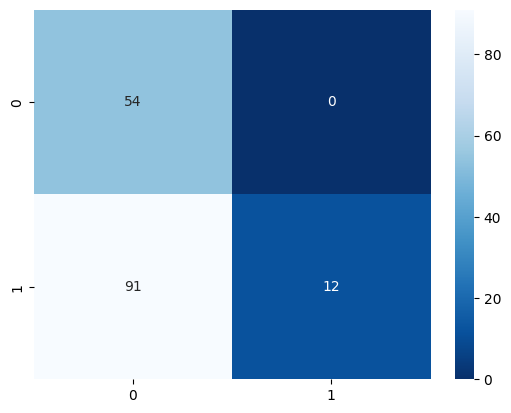

In [187]:
cm = confusion_matrix(y5_test, treshold)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

In [188]:
buy_data = buy_data[df.drop(columns=['id','milk_taste']).columns]
buy_data.drop(columns='breed', inplace=True)

In [189]:
X6_test_ohe = encoder.transform(buy_data[buy_data.select_dtypes(include=['object']).columns])
encoder_col_names = encoder.get_feature_names_out()

In [190]:
X6_test_scaled = scaler.transform(buy_data[buy_data.select_dtypes(exclude=['object']).columns])

In [191]:
X6_test_ohe = pd.DataFrame(X6_test_ohe, columns=encoder_col_names)

In [192]:
X6_test_scaled = pd.DataFrame(X6_test_scaled, columns=buy_data.select_dtypes(exclude=['object']).columns)

In [193]:
X6_test = pd.concat([X6_test_ohe, X6_test_scaled], axis=1)

In [194]:
custom_threshold = 0.82
predictions6 = (clf.predict_proba(X6_test)[:,1] >= custom_threshold).astype(int)

In [195]:
buy_data['milk_taste'] = predictions6
buy_data.query('milk_taste == 1')

,milk_yield,EFU,feed_protein,SPR,pasture,dad_breed,milk_fat,milk_protein,cow_age,SPR_cat,EFU_sqr,dad_name,milk_taste
0,6551.522663,15.3,2020.0,0.96,Холмистое,ВисБикАйдиал,3.58,3.076,более_2_лет,1,234.09,Геркулес,1
1,6203.120843,15.3,2020.0,0.96,Равнинное,ВисБикАйдиал,3.54,3.081,менее_2_лет,1,234.09,Буйный,1
6,6551.522663,15.3,2020.0,0.96,Холмистое,ВисБикАйдиал,3.58,3.076,более_2_лет,1,234.09,Геркулес,1
9,6248.813922,15.3,2020.0,0.96,Холмистое,ВисБикАйдиал,3.40,3.079,менее_2_лет,1,234.09,Буйный,1
13,6067.365997,15.3,2020.0,0.96,Холмистое,РефлешнСоверинг,3.42,3.075,менее_2_лет,1,234.09,Барин,1


## Выводы 

### Выводы.Предобработка.

Для разработки прогнозной модели и оценки выборки были получены 3 датасета
- `ferma_main.csv` - харктеристики стада -> `main_data` размерность (634, 12)
- `ferma_dad.csv` - характеристики папы быка -> `dad_data` размерность (639, 2)
- `cow_buy.csv` - выборка из стада, которую хочет изучить фермер перед покупкой -> `buy_data` размерность (20, 6)


Исправлены названия столбцов main_data
-	id	-	id
-	Удой, кг	-	milk_yield
-	ЭКЕ (Энергетическая кормовая единица)	-	EFU
-	Сырой протеин, г	-	feed_protein
-	СПО (Сахаро-протеиновое соотношение)	-	SPR
-	Порода	-	breed
-	Тип пастбища	-	pasture
-	порода папы_быка	-	dad_breed
-	Жирность,%	-	milk_fat
-	Белок,%	-	milk_protein
-	Вкус молока	-	milk_taste
-	Возраст	-	cow_age


Исправлены названия столбцов dad_data
-	id	-	id
-	Имя	Папы -	dad_name

Исправлены названия столбцов buy_data
-	Порода	-	breed
-	Тип пастбища	-	pasture
-	порода папы_быка	-	dad_breed
-	Имя_папы	-	dad_name
-	Текущая_жирность,%	-	curent_milk_fat
-	Текущий_уровень_белок,%	-	curent_milk_protein

`main_data`
-	удалено 5 полных дублей - новая размерность (629, 12)
-	EFU, SPR, milk_fat, milk_protein - исправлены `,` на `.` переведены в тип `float`
-	milk_yield, feed_protein - переведены в тип `float`
-	breed - убрал пробелы в наименовании породы `Вис Бик Айдиал` -> `ВисБикАйдиал`
-	pasture - заменил значение `Равнинные` на `Равнинное`
-	dad_breed - заменил значение `Айдиалл`->`Айдиал`->`ВисБикАйдиал`, `Соверин`->`РефлешнСоверинг`
-	milk_taste - заменил значение `не вкусно`->`не_вкусно`
-   Есть ошибки в данных о записи породы коров

`buy_data`
-	найденые 4 полных дубля оставлены для проверки работоспособности модели
-   curent_milk_fat, curent_milk_protein - исправил `,` на `.` перервел в тип `float`
-	breed - убрал пробелы в наименовании породы `Вис Бик Айдиал` -> `ВисБикАйдиал`
-	pasture - заменил значение `холмистое`->`Холмистое`, `равнинное`->`Равнинное`
-   dad_breed - заменил значение `Айдиал`->`ВисБикАйдиал`, `Соверин`->`РефлешнСоверинг`

### Выводы. Анализ.

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>feature</th>
      <th>min</th>
      <th>max</th>
      <th>mean</th>
      <th>median</th>
      <th>std</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>milk_yield</td>
      <td>5204.000</td>
      <td>45616.000</td>
      <td>6188.750397</td>
      <td>6133.000</td>
      <td>1644.795489</td>
    </tr>
    <tr>
      <th>1</th>
      <td>EFU</td>
      <td>10.900</td>
      <td>16.800</td>
      <td>14.543879</td>
      <td>14.700</td>
      <td>1.306408</td>
    </tr>
    <tr>
      <th>2</th>
      <td>feed_protein</td>
      <td>1660.000</td>
      <td>2349.000</td>
      <td>1923.364070</td>
      <td>1888.000</td>
      <td>182.956251</td>
    </tr>
    <tr>
      <th>3</th>
      <td>SPR</td>
      <td>0.840</td>
      <td>0.960</td>
      <td>0.913116</td>
      <td>0.930</td>
      <td>0.032203</td>
    </tr>
    <tr>
      <th>4</th>
      <td>milk_fat</td>
      <td>2.990</td>
      <td>3.750</td>
      <td>3.603657</td>
      <td>3.650</td>
      <td>0.168656</td>
    </tr>
    <tr>
      <th>5</th>
      <td>milk_protein</td>
      <td>3.069</td>
      <td>3.085</td>
      <td>3.075671</td>
      <td>3.076</td>
      <td>0.002549</td>
    </tr>
  </tbody>
</table>
</div>

#### Признак удои.

Удаляем аномальный выброс в 45 тыс.литров

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>id</th>
      <th>milk_yield</th>
      <th>EFU</th>
      <th>feed_protein</th>
      <th>SPR</th>
      <th>breed</th>
      <th>pasture</th>
      <th>dad_breed</th>
      <th>milk_fat</th>
      <th>milk_protein</th>
      <th>milk_taste</th>
      <th>cow_age</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>16</th>
      <td>17</td>
      <td>45616.0</td>
      <td>11.5</td>
      <td>1675.0</td>
      <td>0.93</td>
      <td>ВисБикАйдиал</td>
      <td>Холмистое</td>
      <td>ВисБикАйдиал</td>
      <td>3.22</td>
      <td>3.076</td>
      <td>вкусно</td>
      <td>более_2_лет</td>
    </tr>
  </tbody>
</table>
</div>

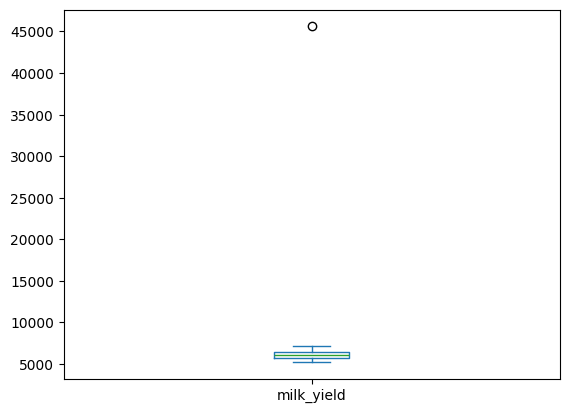

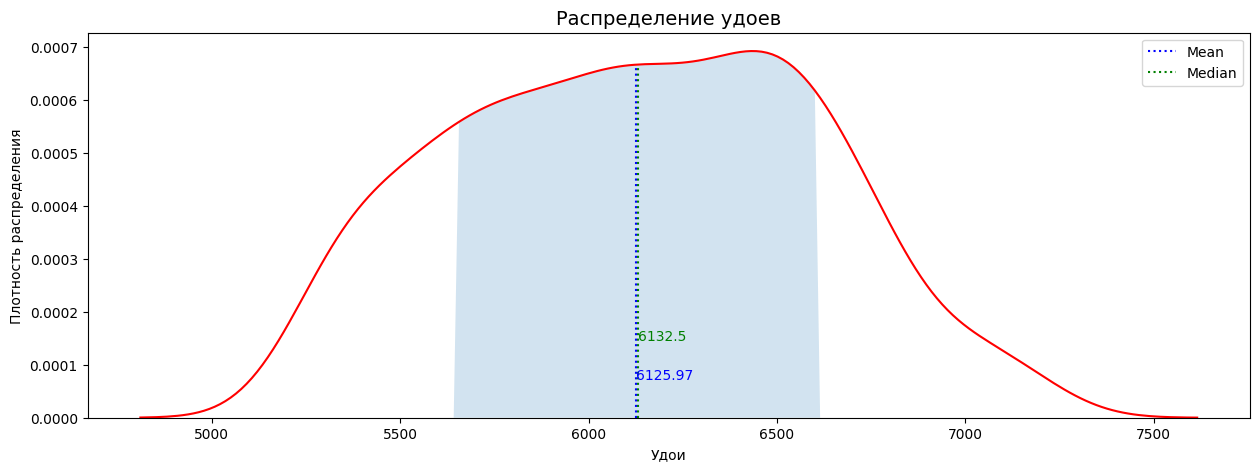

##### Соотношение категориальных признаков с удоем.

<style type="text/css">
</style>
<table id="T_1d1c3">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_1d1c3_level0_col0" class="col_heading level0 col0" >mean</th>
      <th id="T_1d1c3_level0_col1" class="col_heading level0 col1" >max</th>
      <th id="T_1d1c3_level0_col2" class="col_heading level0 col2" >std</th>
      <th id="T_1d1c3_level0_col3" class="col_heading level0 col3" >count</th>
    </tr>
    <tr>
      <th class="blank level1" >&nbsp;</th>
      <th id="T_1d1c3_level1_col0" class="col_heading level1 col0" >milk_yield</th>
      <th id="T_1d1c3_level1_col1" class="col_heading level1 col1" >milk_yield</th>
      <th id="T_1d1c3_level1_col2" class="col_heading level1 col2" >milk_yield</th>
      <th id="T_1d1c3_level1_col3" class="col_heading level1 col3" >milk_yield</th>
    </tr>
    <tr>
      <th class="index_name level0" >dad_breed</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
      <th class="blank col3" >&nbsp;</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_1d1c3_level0_row0" class="row_heading level0 row0" >РефлешнСоверинг</th>
      <td id="T_1d1c3_row0_col0" class="data row0 col0" >5937</td>
      <td id="T_1d1c3_row0_col1" class="data row0 col1" >6701</td>
      <td id="T_1d1c3_row0_col2" class="data row0 col2" >405</td>
      <td id="T_1d1c3_row0_col3" class="data row0 col3" >311</td>
    </tr>
    <tr>
      <th id="T_1d1c3_level0_row1" class="row_heading level0 row1" >ВисБикАйдиал</th>
      <td id="T_1d1c3_row1_col0" class="data row1 col0" >6311</td>
      <td id="T_1d1c3_row1_col1" class="data row1 col1" >7222</td>
      <td id="T_1d1c3_row1_col2" class="data row1 col2" >468</td>
      <td id="T_1d1c3_row1_col3" class="data row1 col3" >317</td>
    </tr>
  </tbody>
</table>


<style type="text/css">
</style>
<table id="T_40600">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_40600_level0_col0" class="col_heading level0 col0" >mean</th>
      <th id="T_40600_level0_col1" class="col_heading level0 col1" >max</th>
      <th id="T_40600_level0_col2" class="col_heading level0 col2" >std</th>
      <th id="T_40600_level0_col3" class="col_heading level0 col3" >count</th>
    </tr>
    <tr>
      <th class="blank level1" >&nbsp;</th>
      <th id="T_40600_level1_col0" class="col_heading level1 col0" >milk_yield</th>
      <th id="T_40600_level1_col1" class="col_heading level1 col1" >milk_yield</th>
      <th id="T_40600_level1_col2" class="col_heading level1 col2" >milk_yield</th>
      <th id="T_40600_level1_col3" class="col_heading level1 col3" >milk_yield</th>
    </tr>
    <tr>
      <th class="index_name level0" >pasture</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
      <th class="blank col3" >&nbsp;</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_40600_level0_row0" class="row_heading level0 row0" >Равнинное</th>
      <td id="T_40600_row0_col0" class="data row0 col0" >6056</td>
      <td id="T_40600_row0_col1" class="data row0 col1" >6991</td>
      <td id="T_40600_row0_col2" class="data row0 col2" >443</td>
      <td id="T_40600_row0_col3" class="data row0 col3" >278</td>
    </tr>
    <tr>
      <th id="T_40600_level0_row1" class="row_heading level0 row1" >Холмистое</th>
      <td id="T_40600_row1_col0" class="data row1 col0" >6181</td>
      <td id="T_40600_row1_col1" class="data row1 col1" >7222</td>
      <td id="T_40600_row1_col2" class="data row1 col2" >494</td>
      <td id="T_40600_row1_col3" class="data row1 col3" >350</td>
    </tr>
  </tbody>
</table>


<style type="text/css">
</style>
<table id="T_daedf">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_daedf_level0_col0" class="col_heading level0 col0" >mean</th>
      <th id="T_daedf_level0_col1" class="col_heading level0 col1" >max</th>
      <th id="T_daedf_level0_col2" class="col_heading level0 col2" >std</th>
      <th id="T_daedf_level0_col3" class="col_heading level0 col3" >count</th>
    </tr>
    <tr>
      <th class="blank level1" >&nbsp;</th>
      <th id="T_daedf_level1_col0" class="col_heading level1 col0" >milk_yield</th>
      <th id="T_daedf_level1_col1" class="col_heading level1 col1" >milk_yield</th>
      <th id="T_daedf_level1_col2" class="col_heading level1 col2" >milk_yield</th>
      <th id="T_daedf_level1_col3" class="col_heading level1 col3" >milk_yield</th>
    </tr>
    <tr>
      <th class="index_name level0" >cow_age</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
      <th class="blank col3" >&nbsp;</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_daedf_level0_row0" class="row_heading level0 row0" >менее_2_лет</th>
      <td id="T_daedf_row0_col0" class="data row0 col0" >5444</td>
      <td id="T_daedf_row0_col1" class="data row0 col1" >6122</td>
      <td id="T_daedf_row0_col2" class="data row0 col2" >148</td>
      <td id="T_daedf_row0_col3" class="data row0 col3" >110</td>
    </tr>
    <tr>
      <th id="T_daedf_level0_row1" class="row_heading level0 row1" >более_2_лет</th>
      <td id="T_daedf_row1_col0" class="data row1 col0" >6271</td>
      <td id="T_daedf_row1_col1" class="data row1 col1" >7222</td>
      <td id="T_daedf_row1_col2" class="data row1 col2" >387</td>
      <td id="T_daedf_row1_col3" class="data row1 col3" >518</td>
    </tr>
  </tbody>
</table>


#### Признак ЭКЕ

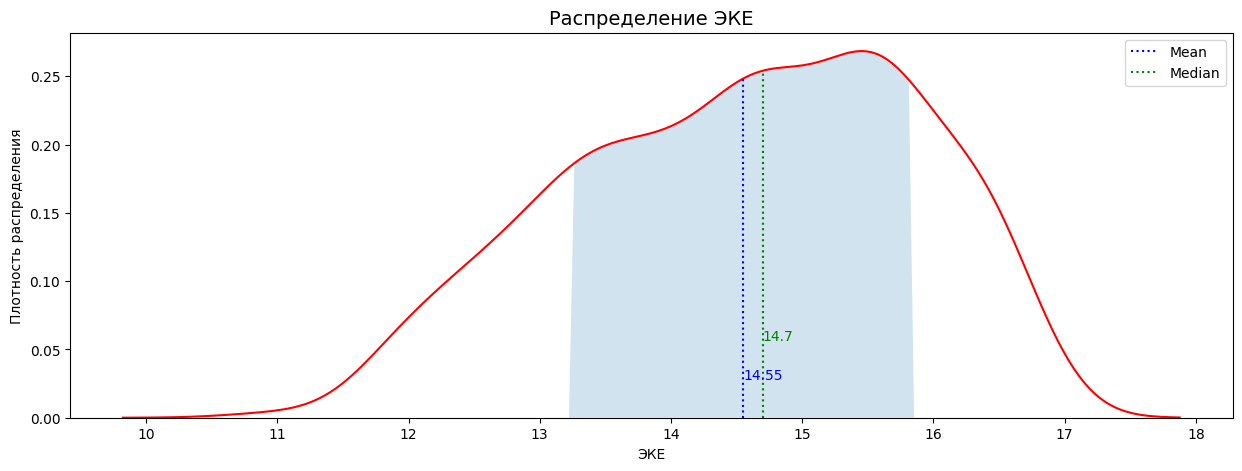

#### Признак СПО

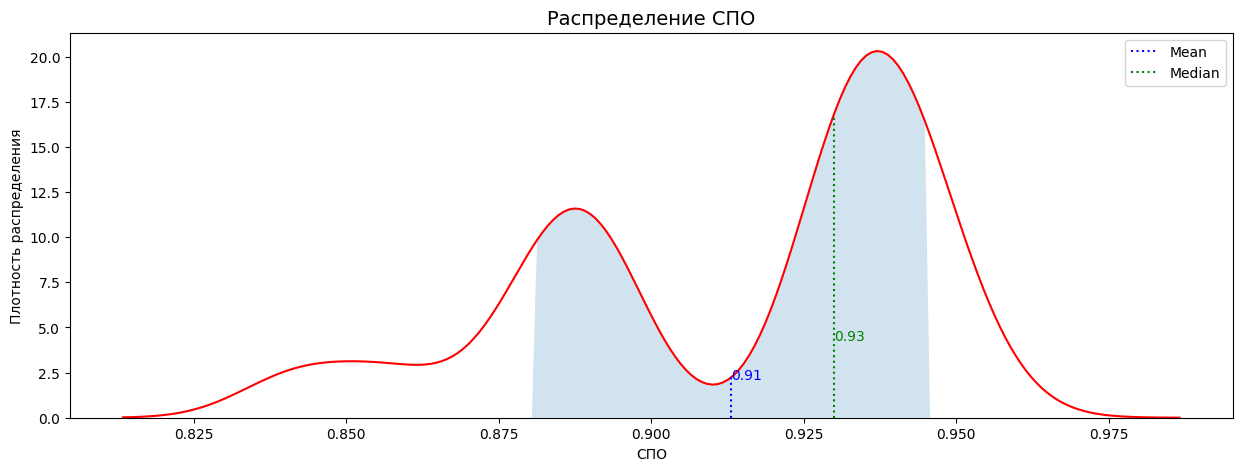

#### Признак Сырой протеин

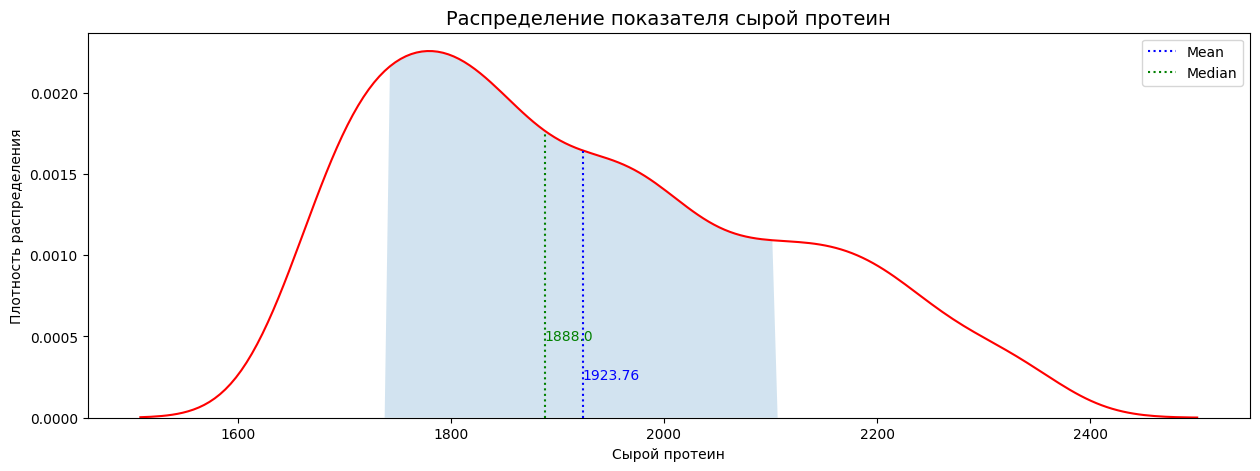

#### Признак вкус

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>milk_taste</th>
      <th>amount</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>вкусно</td>
      <td>370</td>
    </tr>
    <tr>
      <th>1</th>
      <td>не_вкусно</td>
      <td>258</td>
    </tr>
  </tbody>
</table>
</div>

#### Признак жирность

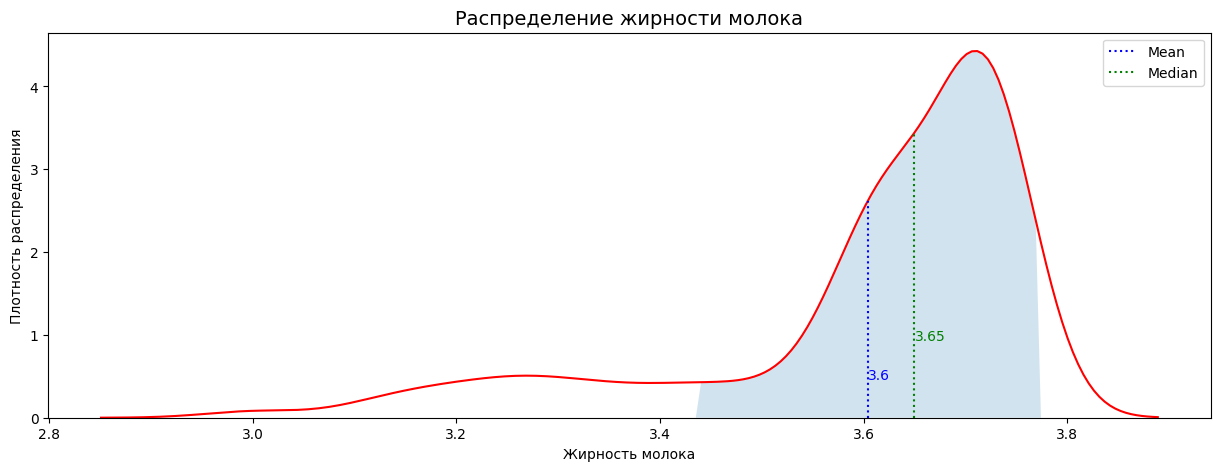

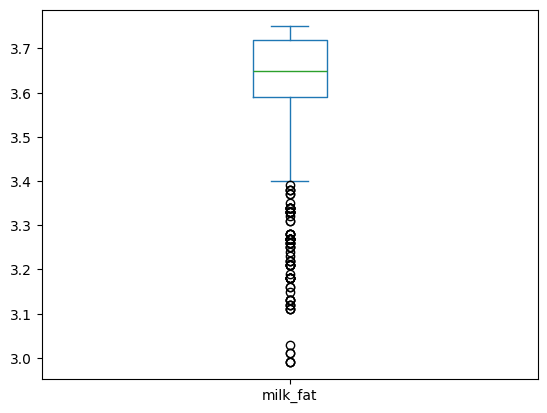

<style type="text/css">
</style>
<table id="T_a0108">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_a0108_level0_col0" class="col_heading level0 col0" >mean</th>
      <th id="T_a0108_level0_col1" class="col_heading level0 col1" >max</th>
      <th id="T_a0108_level0_col2" class="col_heading level0 col2" >std</th>
      <th id="T_a0108_level0_col3" class="col_heading level0 col3" >count</th>
    </tr>
    <tr>
      <th class="blank level1" >&nbsp;</th>
      <th id="T_a0108_level1_col0" class="col_heading level1 col0" >milk_fat</th>
      <th id="T_a0108_level1_col1" class="col_heading level1 col1" >milk_fat</th>
      <th id="T_a0108_level1_col2" class="col_heading level1 col2" >milk_fat</th>
      <th id="T_a0108_level1_col3" class="col_heading level1 col3" >milk_fat</th>
    </tr>
    <tr>
      <th class="index_name level0" >milk_taste</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
      <th class="blank col3" >&nbsp;</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_a0108_level0_row0" class="row_heading level0 row0" >не_вкусно</th>
      <td id="T_a0108_row0_col0" class="data row0 col0" >3.59</td>
      <td id="T_a0108_row0_col1" class="data row0 col1" >3.74</td>
      <td id="T_a0108_row0_col2" class="data row0 col2" >0.17</td>
      <td id="T_a0108_row0_col3" class="data row0 col3" >258.00</td>
    </tr>
    <tr>
      <th id="T_a0108_level0_row1" class="row_heading level0 row1" >вкусно</th>
      <td id="T_a0108_row1_col0" class="data row1 col0" >3.62</td>
      <td id="T_a0108_row1_col1" class="data row1 col1" >3.75</td>
      <td id="T_a0108_row1_col2" class="data row1 col2" >0.16</td>
      <td id="T_a0108_row1_col3" class="data row1 col3" >370.00</td>
    </tr>
  </tbody>
</table>


#### Признак содержание белка

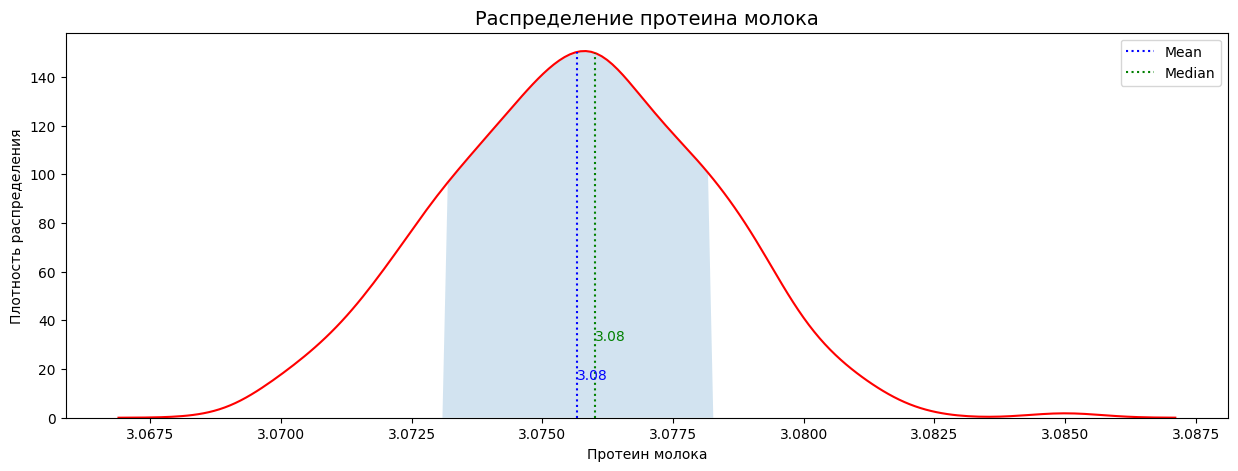

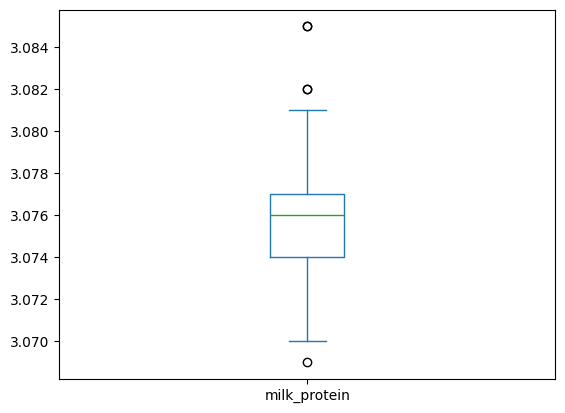

<style type="text/css">
</style>
<table id="T_f9cac">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_f9cac_level0_col0" class="col_heading level0 col0" >mean</th>
      <th id="T_f9cac_level0_col1" class="col_heading level0 col1" >max</th>
      <th id="T_f9cac_level0_col2" class="col_heading level0 col2" >std</th>
      <th id="T_f9cac_level0_col3" class="col_heading level0 col3" >count</th>
    </tr>
    <tr>
      <th class="blank level1" >&nbsp;</th>
      <th id="T_f9cac_level1_col0" class="col_heading level1 col0" >milk_protein</th>
      <th id="T_f9cac_level1_col1" class="col_heading level1 col1" >milk_protein</th>
      <th id="T_f9cac_level1_col2" class="col_heading level1 col2" >milk_protein</th>
      <th id="T_f9cac_level1_col3" class="col_heading level1 col3" >milk_protein</th>
    </tr>
    <tr>
      <th class="index_name level0" >milk_taste</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
      <th class="blank col3" >&nbsp;</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_f9cac_level0_row0" class="row_heading level0 row0" >не_вкусно</th>
      <td id="T_f9cac_row0_col0" class="data row0 col0" >3.0753</td>
      <td id="T_f9cac_row0_col1" class="data row0 col1" >3.0810</td>
      <td id="T_f9cac_row0_col2" class="data row0 col2" >0.0025</td>
      <td id="T_f9cac_row0_col3" class="data row0 col3" >258.0000</td>
    </tr>
    <tr>
      <th id="T_f9cac_level0_row1" class="row_heading level0 row1" >вкусно</th>
      <td id="T_f9cac_row1_col0" class="data row1 col0" >3.0759</td>
      <td id="T_f9cac_row1_col1" class="data row1 col1" >3.0850</td>
      <td id="T_f9cac_row1_col2" class="data row1 col2" >0.0025</td>
      <td id="T_f9cac_row1_col3" class="data row1 col3" >370.0000</td>
    </tr>
  </tbody>
</table>


#### Признак порода отца

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>dad_breed</th>
      <th>amount</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>ВисБикАйдиал</td>
      <td>317</td>
    </tr>
    <tr>
      <th>1</th>
      <td>РефлешнСоверинг</td>
      <td>311</td>
    </tr>
  </tbody>
</table>
</div>

#### Признак пастбище

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>pasture</th>
      <th>amount</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Холмистое</td>
      <td>350</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Равнинное</td>
      <td>278</td>
    </tr>
  </tbody>
</table>
</div>

#### Признак возраст коровы

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>cow_age</th>
      <th>amount</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>более_2_лет</td>
      <td>518</td>
    </tr>
    <tr>
      <th>1</th>
      <td>менее_2_лет</td>
      <td>110</td>
    </tr>
  </tbody>
</table>
</div>

### Выводы корреляция

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>EFU</th>
      <th>SPR</th>
      <th>cow_age_bool</th>
      <th>dad_breed_bool</th>
      <th>feed_protein</th>
      <th>milk_fat</th>
      <th>milk_protein</th>
      <th>milk_taste_bool</th>
      <th>milk_yield</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>EFU</th>
      <td>1.000000</td>
      <td>0.741962</td>
      <td>0.529561</td>
      <td>0.088061</td>
      <td>0.384747</td>
      <td>0.686973</td>
      <td>-0.013321</td>
      <td>0.225177</td>
      <td>0.765144</td>
    </tr>
    <tr>
      <th>SPR</th>
      <td>0.741962</td>
      <td>1.000000</td>
      <td>0.506498</td>
      <td>0.166183</td>
      <td>0.485890</td>
      <td>0.701044</td>
      <td>0.109924</td>
      <td>0.259041</td>
      <td>0.787904</td>
    </tr>
    <tr>
      <th>cow_age_bool</th>
      <td>0.529561</td>
      <td>0.506498</td>
      <td>1.000000</td>
      <td>0.239013</td>
      <td>0.292011</td>
      <td>0.474238</td>
      <td>0.003979</td>
      <td>0.117584</td>
      <td>0.647025</td>
    </tr>
    <tr>
      <th>dad_breed_bool</th>
      <td>0.088061</td>
      <td>0.166183</td>
      <td>0.239013</td>
      <td>1.000000</td>
      <td>0.009592</td>
      <td>0.007479</td>
      <td>0.052634</td>
      <td>0.001505</td>
      <td>0.385846</td>
    </tr>
    <tr>
      <th>feed_protein</th>
      <td>0.384747</td>
      <td>0.485890</td>
      <td>0.292011</td>
      <td>0.009592</td>
      <td>1.000000</td>
      <td>0.392822</td>
      <td>0.229051</td>
      <td>0.145765</td>
      <td>0.437543</td>
    </tr>
    <tr>
      <th>milk_fat</th>
      <td>0.686973</td>
      <td>0.701044</td>
      <td>0.474238</td>
      <td>0.007479</td>
      <td>0.392822</td>
      <td>1.000000</td>
      <td>0.043125</td>
      <td>0.135244</td>
      <td>0.688506</td>
    </tr>
    <tr>
      <th>milk_protein</th>
      <td>-0.013321</td>
      <td>0.109924</td>
      <td>0.003979</td>
      <td>0.052634</td>
      <td>0.229051</td>
      <td>0.043125</td>
      <td>1.000000</td>
      <td>0.115930</td>
      <td>-0.005701</td>
    </tr>
    <tr>
      <th>milk_taste_bool</th>
      <td>0.225177</td>
      <td>0.259041</td>
      <td>0.117584</td>
      <td>0.001505</td>
      <td>0.145765</td>
      <td>0.135244</td>
      <td>0.115930</td>
      <td>1.000000</td>
      <td>0.102273</td>
    </tr>
    <tr>
      <th>milk_yield</th>
      <td>0.765144</td>
      <td>0.787904</td>
      <td>0.647025</td>
      <td>0.385846</td>
      <td>0.437543</td>
      <td>0.688506</td>
      <td>-0.005701</td>
      <td>0.102273</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>
</div>

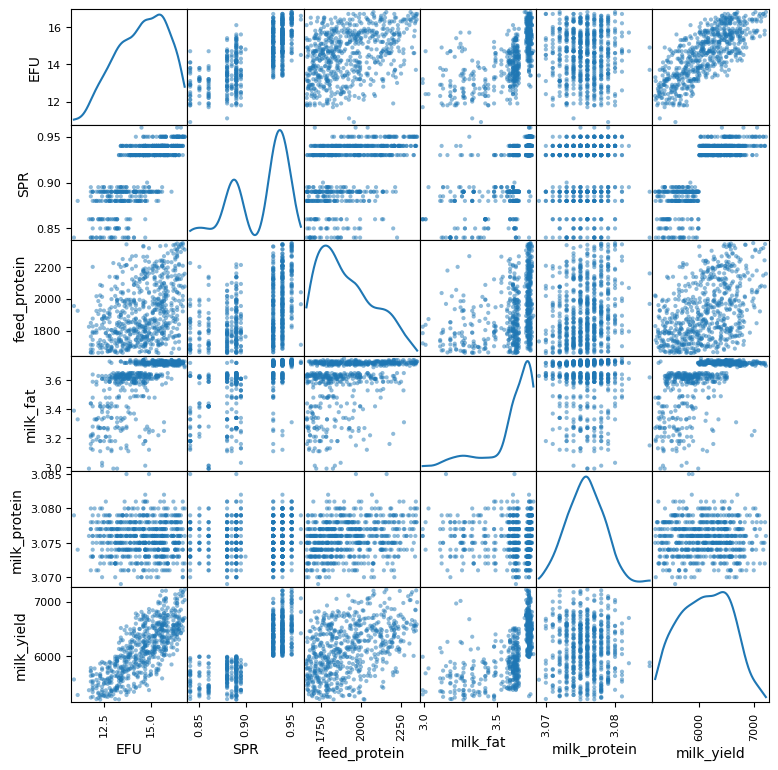

Корреляция признака Удои

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>milk_yield</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>milk_yield</th>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>SPR</th>
      <td>0.787904</td>
    </tr>
    <tr>
      <th>EFU</th>
      <td>0.765144</td>
    </tr>
    <tr>
      <th>milk_fat</th>
      <td>0.688506</td>
    </tr>
    <tr>
      <th>cow_age_bool</th>
      <td>0.647025</td>
    </tr>
    <tr>
      <th>feed_protein</th>
      <td>0.437543</td>
    </tr>
    <tr>
      <th>dad_breed_bool</th>
      <td>0.385846</td>
    </tr>
    <tr>
      <th>milk_taste_bool</th>
      <td>0.102273</td>
    </tr>
    <tr>
      <th>milk_protein</th>
      <td>-0.005701</td>
    </tr>
  </tbody>
</table>
</div>

Корреляция признака вкус

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>milk_taste_bool</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>milk_taste_bool</th>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>SPR</th>
      <td>0.259041</td>
    </tr>
    <tr>
      <th>EFU</th>
      <td>0.225177</td>
    </tr>
    <tr>
      <th>feed_protein</th>
      <td>0.145765</td>
    </tr>
    <tr>
      <th>milk_fat</th>
      <td>0.135244</td>
    </tr>
    <tr>
      <th>cow_age_bool</th>
      <td>0.117584</td>
    </tr>
    <tr>
      <th>milk_protein</th>
      <td>0.115930</td>
    </tr>
    <tr>
      <th>milk_yield</th>
      <td>0.102273</td>
    </tr>
    <tr>
      <th>dad_breed_bool</th>
      <td>0.001505</td>
    </tr>
  </tbody>
</table>
</div>

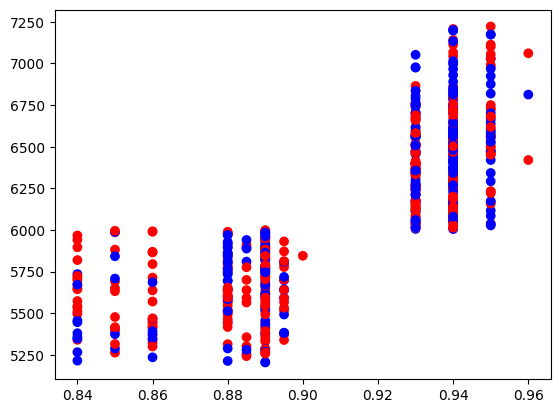

Корреляция удои и СПО имеет явно разрыв в значениях, которые потенциально можно разделить(по значению 0.9) на 2 группы и перевести в категориальный признак

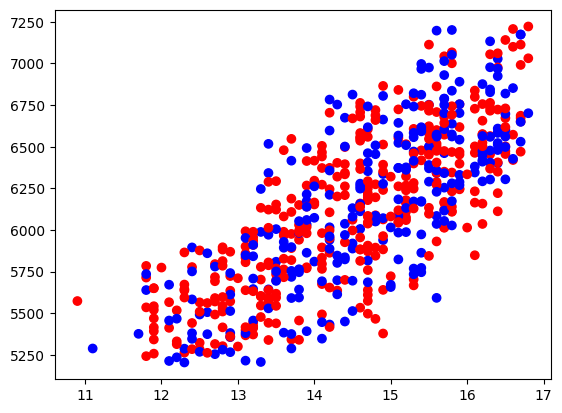

Корреляция Удои и ЭКЕ имеет экспонециальную зависимость, имеет смысл сконструировать дополнительный признак возведя значения ЭКЕ в квадрат

### Модель линейной регрессии

#### 1-я модель

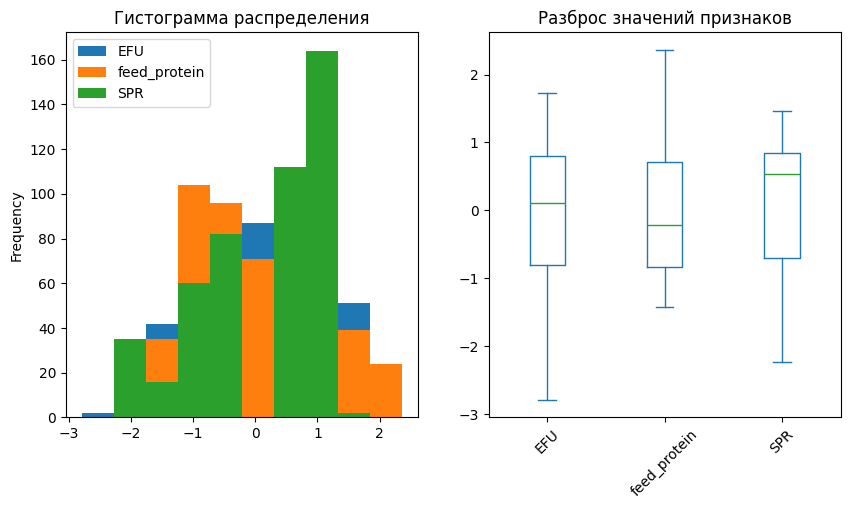

Метрики качества 1й модели

- MSE = 51419
- RMSE = 227
- MAE = 179
- R2 = 0.80


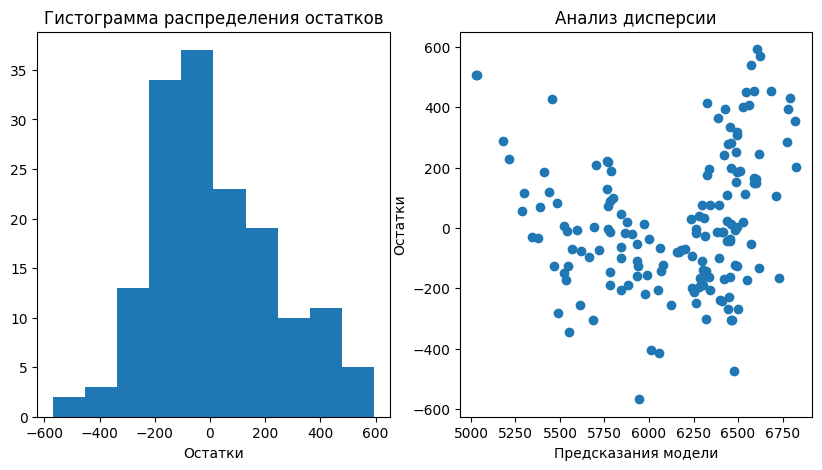

#### 2-я модель

Добавлено 2 новых признака
- SPR_cat - категориальный признак СПО поделенный не две группы по значению 0.9
- EFU_sqr - количественный признак ЭКЕ возведенный в квадрат

Метрики качества 2й модели
- MSE2 = 44556
- RMSE2 = 211
- MAE2 = 165
- R2_2 = 0.83


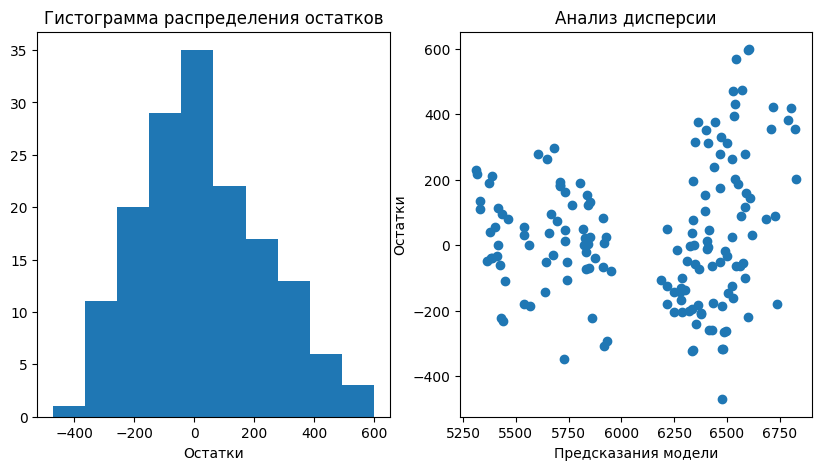

#### 3-я модель

- `dad_name` - добавили категориальный признак имя отца
- `dad_breed` - исправили значения породы отца исходя из имени

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th>count</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th>milk_yield</th>
    </tr>
    <tr>
      <th>dad_name</th>
      <th>dad_breed</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Барин</th>
      <th>РефлешнСоверинг</th>
      <td>240</td>
    </tr>
    <tr>
      <th>Буйный</th>
      <th>ВисБикАйдиал</th>
      <td>214</td>
    </tr>
    <tr>
      <th>Геркулес</th>
      <th>ВисБикАйдиал</th>
      <td>64</td>
    </tr>
    <tr>
      <th>Соловчик</th>
      <th>РефлешнСоверинг</th>
      <td>110</td>
    </tr>
  </tbody>
</table>
</div>

Метрики качества 3й модели
- MSE3 = 36635
- RMSE3 = 191
- MAE3 = 151
- R2_3 = 0.86


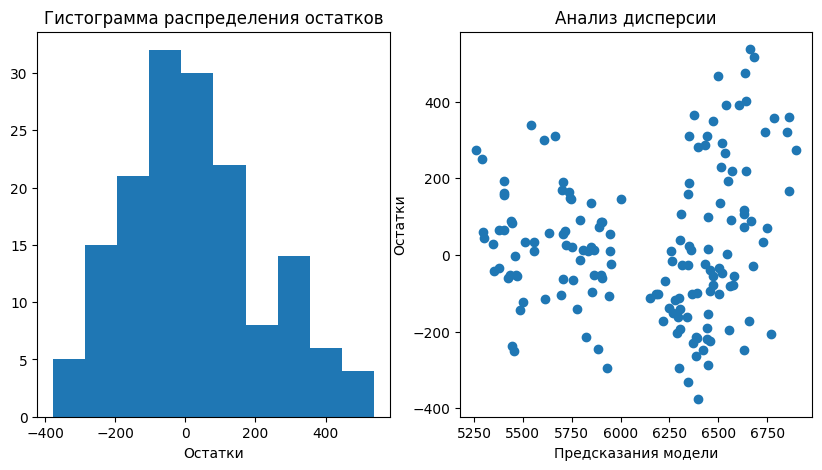

На основе 3й модели оценили удои выбоки коров на покупку

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>milk_yield</th>
      <th>breed</th>
      <th>pasture</th>
      <th>dad_breed</th>
      <th>dad_name</th>
      <th>milk_fat</th>
      <th>milk_protein</th>
      <th>cow_age</th>
      <th>EFU</th>
      <th>SPR</th>
      <th>feed_protein</th>
      <th>SPR_cat</th>
      <th>EFU_sqr</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>12</th>
      <td>6854.949359</td>
      <td>ВисБикАйдиал</td>
      <td>Холмистое</td>
      <td>ВисБикАйдиал</td>
      <td>Геркулес</td>
      <td>3.68</td>
      <td>3.046</td>
      <td>более_2_лет</td>
      <td>15.3</td>
      <td>0.96</td>
      <td>2020.0</td>
      <td>1</td>
      <td>234.09</td>
    </tr>
    <tr>
      <th>3</th>
      <td>6656.758868</td>
      <td>РефлешнСоверинг</td>
      <td>Холмистое</td>
      <td>ВисБикАйдиал</td>
      <td>Буйный</td>
      <td>3.40</td>
      <td>3.061</td>
      <td>более_2_лет</td>
      <td>15.3</td>
      <td>0.96</td>
      <td>2020.0</td>
      <td>1</td>
      <td>234.09</td>
    </tr>
    <tr>
      <th>15</th>
      <td>6618.996303</td>
      <td>РефлешнСоверинг</td>
      <td>Холмистое</td>
      <td>ВисБикАйдиал</td>
      <td>Буйный</td>
      <td>3.40</td>
      <td>3.065</td>
      <td>более_2_лет</td>
      <td>15.3</td>
      <td>0.96</td>
      <td>2020.0</td>
      <td>1</td>
      <td>234.09</td>
    </tr>
    <tr>
      <th>10</th>
      <td>6556.835331</td>
      <td>ВисБикАйдиал</td>
      <td>Холмистое</td>
      <td>РефлешнСоверинг</td>
      <td>Соловчик</td>
      <td>3.73</td>
      <td>3.055</td>
      <td>более_2_лет</td>
      <td>15.3</td>
      <td>0.96</td>
      <td>2020.0</td>
      <td>1</td>
      <td>234.09</td>
    </tr>
    <tr>
      <th>11</th>
      <td>6555.053536</td>
      <td>РефлешнСоверинг</td>
      <td>Равнинное</td>
      <td>ВисБикАйдиал</td>
      <td>Геркулес</td>
      <td>3.73</td>
      <td>3.073</td>
      <td>более_2_лет</td>
      <td>15.3</td>
      <td>0.96</td>
      <td>2020.0</td>
      <td>1</td>
      <td>234.09</td>
    </tr>
    <tr>
      <th>6</th>
      <td>6551.522663</td>
      <td>ВисБикАйдиал</td>
      <td>Холмистое</td>
      <td>ВисБикАйдиал</td>
      <td>Геркулес</td>
      <td>3.58</td>
      <td>3.076</td>
      <td>более_2_лет</td>
      <td>15.3</td>
      <td>0.96</td>
      <td>2020.0</td>
      <td>1</td>
      <td>234.09</td>
    </tr>
    <tr>
      <th>0</th>
      <td>6551.522663</td>
      <td>ВисБикАйдиал</td>
      <td>Холмистое</td>
      <td>ВисБикАйдиал</td>
      <td>Геркулес</td>
      <td>3.58</td>
      <td>3.076</td>
      <td>более_2_лет</td>
      <td>15.3</td>
      <td>0.96</td>
      <td>2020.0</td>
      <td>1</td>
      <td>234.09</td>
    </tr>
    <tr>
      <th>4</th>
      <td>6527.426187</td>
      <td>РефлешнСоверинг</td>
      <td>Равнинное</td>
      <td>ВисБикАйдиал</td>
      <td>Буйный</td>
      <td>3.64</td>
      <td>3.074</td>
      <td>более_2_лет</td>
      <td>15.3</td>
      <td>0.96</td>
      <td>2020.0</td>
      <td>1</td>
      <td>234.09</td>
    </tr>
    <tr>
      <th>19</th>
      <td>6527.426187</td>
      <td>РефлешнСоверинг</td>
      <td>Равнинное</td>
      <td>ВисБикАйдиал</td>
      <td>Буйный</td>
      <td>3.64</td>
      <td>3.074</td>
      <td>более_2_лет</td>
      <td>15.3</td>
      <td>0.96</td>
      <td>2020.0</td>
      <td>1</td>
      <td>234.09</td>
    </tr>
    <tr>
      <th>18</th>
      <td>6514.007034</td>
      <td>ВисБикАйдиал</td>
      <td>Равнинное</td>
      <td>ВисБикАйдиал</td>
      <td>Буйный</td>
      <td>3.34</td>
      <td>3.069</td>
      <td>более_2_лет</td>
      <td>15.3</td>
      <td>0.96</td>
      <td>2020.0</td>
      <td>1</td>
      <td>234.09</td>
    </tr>
    <tr>
      <th>17</th>
      <td>6513.935945</td>
      <td>РефлешнСоверинг</td>
      <td>Равнинное</td>
      <td>ВисБикАйдиал</td>
      <td>Геркулес</td>
      <td>3.77</td>
      <td>3.053</td>
      <td>менее_2_лет</td>
      <td>15.3</td>
      <td>0.96</td>
      <td>2020.0</td>
      <td>1</td>
      <td>234.09</td>
    </tr>
    <tr>
      <th>5</th>
      <td>6485.645511</td>
      <td>РефлешнСоверинг</td>
      <td>Равнинное</td>
      <td>ВисБикАйдиал</td>
      <td>Геркулес</td>
      <td>3.63</td>
      <td>3.053</td>
      <td>менее_2_лет</td>
      <td>15.3</td>
      <td>0.96</td>
      <td>2020.0</td>
      <td>1</td>
      <td>234.09</td>
    </tr>
    <tr>
      <th>7</th>
      <td>6466.077762</td>
      <td>ВисБикАйдиал</td>
      <td>Равнинное</td>
      <td>ВисБикАйдиал</td>
      <td>Буйный</td>
      <td>3.57</td>
      <td>3.079</td>
      <td>более_2_лет</td>
      <td>15.3</td>
      <td>0.96</td>
      <td>2020.0</td>
      <td>1</td>
      <td>234.09</td>
    </tr>
    <tr>
      <th>16</th>
      <td>6330.259937</td>
      <td>ВисБикАйдиал</td>
      <td>Холмистое</td>
      <td>РефлешнСоверинг</td>
      <td>Соловчик</td>
      <td>3.73</td>
      <td>3.079</td>
      <td>более_2_лет</td>
      <td>15.3</td>
      <td>0.96</td>
      <td>2020.0</td>
      <td>1</td>
      <td>234.09</td>
    </tr>
    <tr>
      <th>8</th>
      <td>6294.070478</td>
      <td>РефлешнСоверинг</td>
      <td>Равнинное</td>
      <td>РефлешнСоверинг</td>
      <td>Барин</td>
      <td>3.59</td>
      <td>3.074</td>
      <td>более_2_лет</td>
      <td>15.3</td>
      <td>0.96</td>
      <td>2020.0</td>
      <td>1</td>
      <td>234.09</td>
    </tr>
    <tr>
      <th>14</th>
      <td>6294.070478</td>
      <td>РефлешнСоверинг</td>
      <td>Равнинное</td>
      <td>РефлешнСоверинг</td>
      <td>Барин</td>
      <td>3.59</td>
      <td>3.074</td>
      <td>более_2_лет</td>
      <td>15.3</td>
      <td>0.96</td>
      <td>2020.0</td>
      <td>1</td>
      <td>234.09</td>
    </tr>
    <tr>
      <th>2</th>
      <td>6294.070478</td>
      <td>РефлешнСоверинг</td>
      <td>Равнинное</td>
      <td>РефлешнСоверинг</td>
      <td>Барин</td>
      <td>3.59</td>
      <td>3.074</td>
      <td>более_2_лет</td>
      <td>15.3</td>
      <td>0.96</td>
      <td>2020.0</td>
      <td>1</td>
      <td>234.09</td>
    </tr>
    <tr>
      <th>9</th>
      <td>6248.813922</td>
      <td>РефлешнСоверинг</td>
      <td>Холмистое</td>
      <td>ВисБикАйдиал</td>
      <td>Буйный</td>
      <td>3.40</td>
      <td>3.079</td>
      <td>менее_2_лет</td>
      <td>15.3</td>
      <td>0.96</td>
      <td>2020.0</td>
      <td>1</td>
      <td>234.09</td>
    </tr>
    <tr>
      <th>1</th>
      <td>6203.120843</td>
      <td>ВисБикАйдиал</td>
      <td>Равнинное</td>
      <td>ВисБикАйдиал</td>
      <td>Буйный</td>
      <td>3.54</td>
      <td>3.081</td>
      <td>менее_2_лет</td>
      <td>15.3</td>
      <td>0.96</td>
      <td>2020.0</td>
      <td>1</td>
      <td>234.09</td>
    </tr>
    <tr>
      <th>13</th>
      <td>6067.365997</td>
      <td>ВисБикАйдиал</td>
      <td>Холмистое</td>
      <td>РефлешнСоверинг</td>
      <td>Барин</td>
      <td>3.42</td>
      <td>3.075</td>
      <td>менее_2_лет</td>
      <td>15.3</td>
      <td>0.96</td>
      <td>2020.0</td>
      <td>1</td>
      <td>234.09</td>
    </tr>
  </tbody>
</table>
</div>

### Модель логистической регрессии

Метрики качества модели логистической регрессии
- accuracy:  0.739
- recall:  0.806
- precision:  0.798

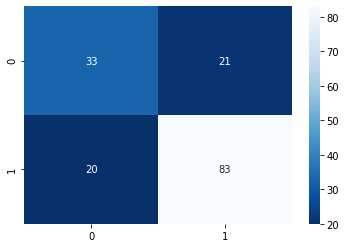

Для получение гарантированного предсказания показателя молока вкусно максимизируем показатель `precision`. Он должен равняться 1

treshold	accuracy	precision
- 	0.10	0.668790	0.664516
- 	0.19	0.681529	0.675497
- 	0.28	0.675159	0.675676
- 	0.37	0.726115	0.723881
- 	0.46	0.745223	0.769231
- 	0.55	0.707006	0.806452
-	0.64	0.605096	0.859649
- 	0.73	0.490446	0.848485
- 	0.82	0.420382	1.000000
- 	0.91	0.350318	1.000000

при пороге отсечения 0.82 мы получаем отсутствие ложно положительных результатов

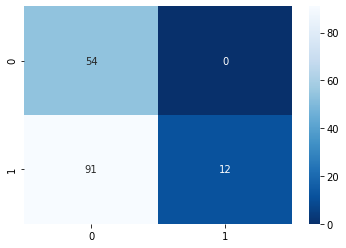

Оценили выборку коров для покупки с помощью обученной модели

Реккомендованы к покупке следующие коровы

In [196]:
buy_data.drop(columns=['SPR_cat', 'EFU_sqr']).query('milk_taste == 1')

,milk_yield,EFU,feed_protein,SPR,pasture,dad_breed,milk_fat,milk_protein,cow_age,dad_name,milk_taste
0,6551.522663,15.3,2020.0,0.96,Холмистое,ВисБикАйдиал,3.58,3.076,более_2_лет,Геркулес,1
1,6203.120843,15.3,2020.0,0.96,Равнинное,ВисБикАйдиал,3.54,3.081,менее_2_лет,Буйный,1
6,6551.522663,15.3,2020.0,0.96,Холмистое,ВисБикАйдиал,3.58,3.076,более_2_лет,Геркулес,1
9,6248.813922,15.3,2020.0,0.96,Холмистое,ВисБикАйдиал,3.40,3.079,менее_2_лет,Буйный,1
13,6067.365997,15.3,2020.0,0.96,Холмистое,РефлешнСоверинг,3.42,3.075,менее_2_лет,Барин,1
